In [ ]:
import extract_paths
import matplotlib.pyplot as pyp

paths = extract_paths.load_paths('g21/matches/')

In [ ]:
from extract_paths import ind
import numpy as np

print('Number of paths:')
print(len(paths))
for i in range(len(paths)):
    print(i)
    #computes some statistics of the paths
    paths[i][ind('high_b_lyap')] = len( [x for x in paths[i][ind('b_lyap')] if x == 0] )
    paths[i][ind('high_d_lyap')] = len( [x for x in paths[i][ind('d_lyap')] if x == 0] )
    pathlen = paths[i][2] - paths[i][1]
    #if( (int)(0.05*pathlen) > 0 ):
    #    paths[i][ind('avg_p_firstpts')] = np.average( ( np.array(paths[i][ind('death')]) - np.array(paths[i][ind('birth')]) )[0:(int)(0.05*pathlen)] )
    #if( (int)(0.95*pathlen) < pathlen-1 ):
    #    paths[i][ind('avg_p_lastpts')] = np.average( ( np.array(paths[i][ind('death')]) - np.array(paths[i][ind('birth')]) )[(int)(0.95*pathlen):pathlen-1] )
    paths[i][ind('max_p')] = np.max( np.array(paths[i][ind('death')]) - np.array(paths[i][ind('birth')]) )
    #paths[i][ind('avg_b')] = np.average( np.array(paths[i][ind('birth')]) )


In [56]:
#plots all paths satisfying certain characteristic

from extract_paths import ind
import numpy as np

def notnoisy(maxbirth, mindeath):
    return maxbirth > 50 and mindeath < 200

def computesat(death_b, birth_b, death_e, birth_e, fldist, maxbirth, mindeath):
    return ( (death_b-birth_b) < 30 or (death_e - birth_e) < 30 ) and fldist > 300 and notnoisy(maxbirth, mindeath)

count = 0
countfilteredpaths = 0
counttotalpaths = 0
countfilteredandinteresting = 0

LEN = 8998

framecoverall = np.zeros(LEN, dtype = float)
framecover = np.zeros(LEN, dtype = float)
framecoverminnoise = np.zeros(LEN, dtype = float)
framecoverfull = np.zeros(LEN, dtype = float)

for i in range(len(paths)):
    begin = paths[i][1]
    end = paths[i][2]
    pathlen = paths[i][2] - paths[i][1]
    fldist = (paths[i][ind('birth')][0]-paths[i][ind('birth')][-1])*(paths[i][ind('birth')][0]-paths[i][ind('birth')][-1]) + (paths[i][ind('death')][0]-paths[i][ind('death')][-1])*(paths[i][ind('death')][0]-paths[i][ind('death')][-1])    
    maxbirth = np.amax(paths[i][ind('birth')])
    mindeath = np.amin(paths[i][ind('death')])
    
    sat = computesat(paths[i][ind('death')][0], paths[i][ind('birth')][0], paths[i][ind('death')][-1], paths[i][ind('birth')][-1], fldist, maxbirth, mindeath)
    
    if( sat ):
        framecoverall[ begin : end ] += 1
    if( sat  and paths[i][ind('high_b_lyap')] > 4 ):
        framecover[ begin : end ] += 1        
    framecoverfull[begin : end] += 1
    if( notnoisy(maxbirth, mindeath)):
        framecoverminnoise[begin : end] += 1

7725


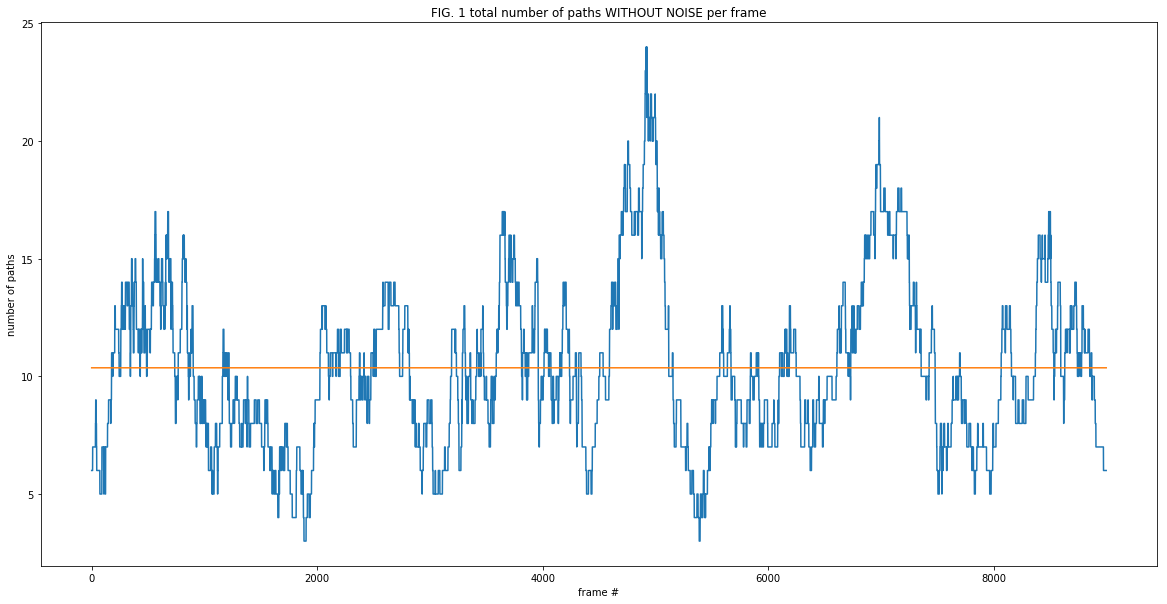

In [85]:
avg = np.zeros( LEN, dtype=float)
avg.fill(np.average(framecoverminnoise))        
print(len(paths))   
pyp.figure( figsize=(20,10) )
pyp.title('FIG. 1 total number of paths WITHOUT NOISE per frame')
pyp.xlabel('frame #')
pyp.ylabel('number of paths')
pyp.plot(range(LEN), framecoverminnoise, range(LEN), avg)
pyp.show()

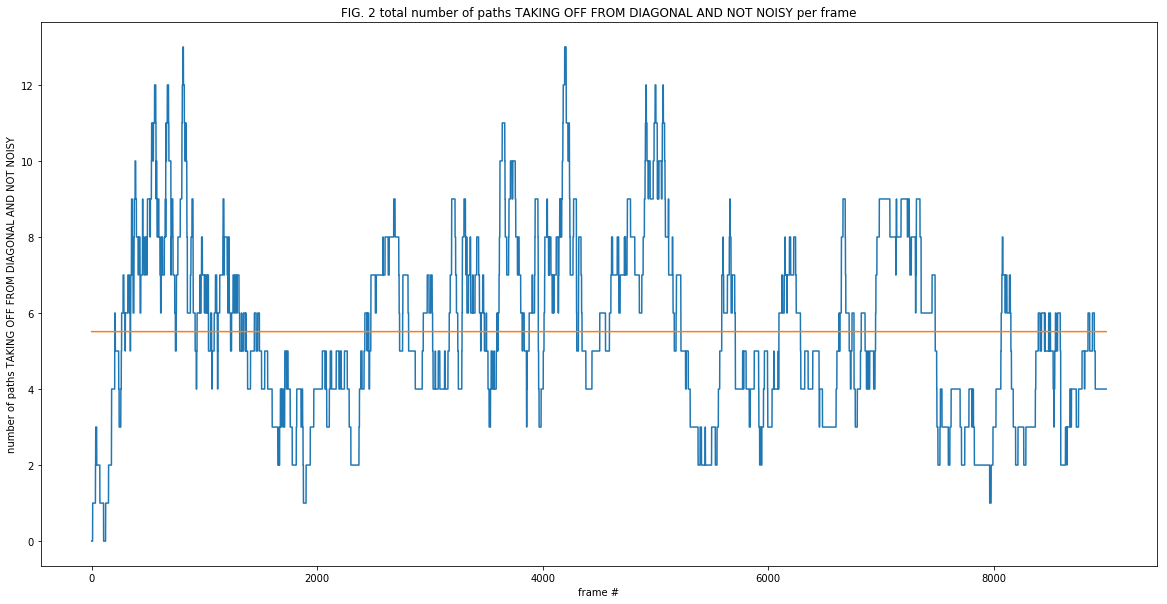

In [86]:
avg = np.zeros( LEN, dtype=float)
avg.fill(np.average(framecoverall))
pyp.figure( figsize=(20,10) )
pyp.title('FIG. 2 total number of paths TAKING OFF FROM DIAGONAL AND NOT NOISY per frame')
pyp.xlabel('frame #')
pyp.ylabel('number of paths TAKING OFF FROM DIAGONAL AND NOT NOISY')
pyp.plot(range(LEN), framecoverall, range(LEN), avg)
pyp.show()

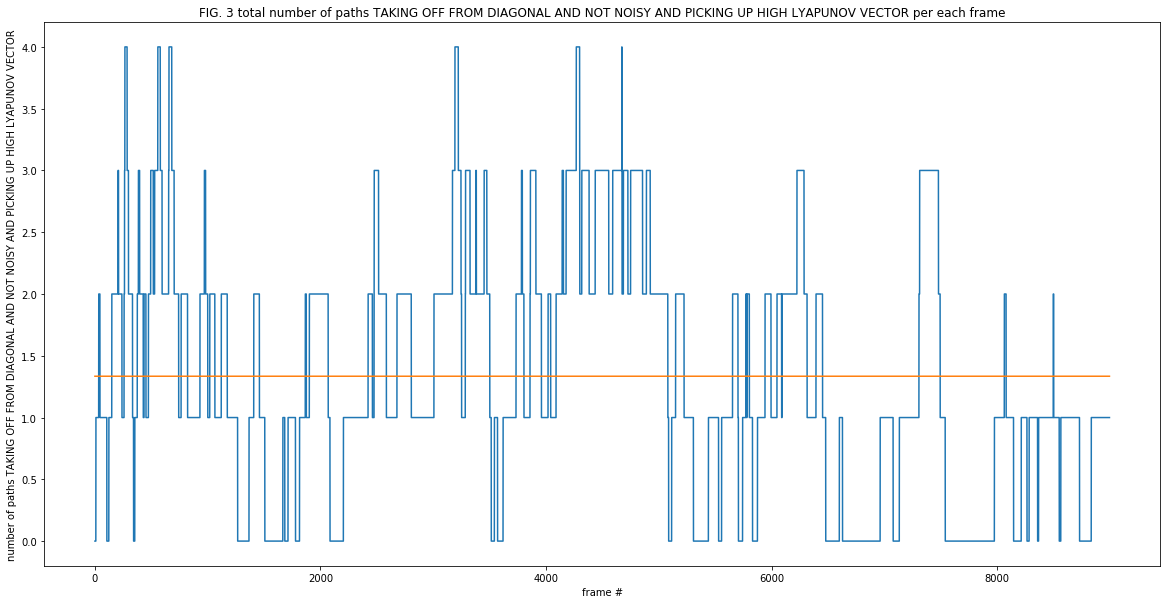

In [87]:
avg = np.zeros( LEN, dtype=float)
avg.fill(np.average(framecover))
pyp.figure( figsize=(20,10) )
pyp.title('FIG. 3 total number of paths TAKING OFF FROM DIAGONAL AND NOT NOISY AND PICKING UP HIGH LYAPUNOV VECTOR per each frame')
pyp.xlabel('frame #')
pyp.ylabel('number of paths TAKING OFF FROM DIAGONAL AND NOT NOISY AND PICKING UP HIGH LYAPUNOV VECTOR')
pyp.plot(range(LEN), framecover, range(LEN), avg)
pyp.show()       

In [88]:
print('Probability that at an instant of time there is at least one \'arch\' picking up high Lyapunov vector')
print( (str)(len( [x for x in framecover if x > 0] ) / len( framecover )) ) 

Probability that at an instant of time there is at least one 'arch' picking up high Lyapunov vector
0.7790620137808402


In [89]:
#computes paths minimal distances from Lyapunov vector blobs
import numpy as np
import skimage as ski
from skimage import io
from extract_paths import ind

def notnoisy(maxbirth, mindeath):
    return maxbirth > 50 and mindeath < 200

def computesat(death_b, birth_b, death_e, birth_e, fldist, maxbirth, mindeath):
    return ( (death_b-birth_b) < 30 or (death_e - birth_e) < 30 ) and fldist > 300 and notnoisy(maxbirth, mindeath)

spotsdir = 'g21per_spots2/'

pathmindists = np.zeros((len(paths),), dtype = float)
closepts = np.zeros((len(paths),), dtype = float)

for i in range(len(paths)):
    begin = paths[i][1]
    end = paths[i][2]
    pathlen = paths[i][2] - paths[i][1]
    fldist = (paths[i][ind('birth')][0]-paths[i][ind('birth')][-1])*(paths[i][ind('birth')][0]-paths[i][ind('birth')][-1]) + (paths[i][ind('death')][0]-paths[i][ind('death')][-1])*(paths[i][ind('death')][0]-paths[i][ind('death')][-1])    
    maxbirth = np.amax(paths[i][ind('birth')])
    mindeath = np.amin(paths[i][ind('death')])

    sat = computesat(paths[i][ind('death')][0], paths[i][ind('birth')][0], paths[i][ind('death')][-1], paths[i][ind('birth')][-1], fldist, maxbirth, mindeath)
    if( sat ):           
        dists = []
        for j in range(pathlen):
            curframe = paths[i][1] + j
            img = io.imread(spotsdir + '%05d.bmp'%curframe)
            mask = (img == 255)
            indices = np.nonzero(mask)
            nrindices = len(indices[0])

            #compute mindists (currently distance of first point on the path)
            if(paths[i][ind('dim')] == 0): #plume location is (b_x,b_y)
                dists.append( np.min(np.sqrt( (np.full((nrindices,), paths[i][ind('b_x')][j]) - indices[1])*(np.full((nrindices,), paths[i][ind('b_x')][j]) - indices[1]) + (np.full((nrindices,), paths[i][ind('b_y')][j]) - indices[0])*( np.full((nrindices,), paths[i][ind('b_y')][j]) - indices[0] ) ) ) )
            if(paths[i][ind('dim')] == 1): #plume location is (d_x,d_y)
                dists.append( np.min(np.sqrt( (np.full((nrindices,), paths[i][ind('d_x')][j]) - indices[1])*(np.full((nrindices,), paths[i][ind('d_x')][j]) - indices[1]) + (np.full((nrindices,), paths[i][ind('d_y')][j]) - indices[0])*( np.full((nrindices,), paths[i][ind('d_y')][j]) - indices[0] ) ) ) )                          
        closepts[i] = np.sum(np.asarray(dists) < 10)        
        pathmindists[i] = np.min(np.array(dists))        
        #paths[i].append(pathmindists[i])
        paths[i].append(closepts[i])

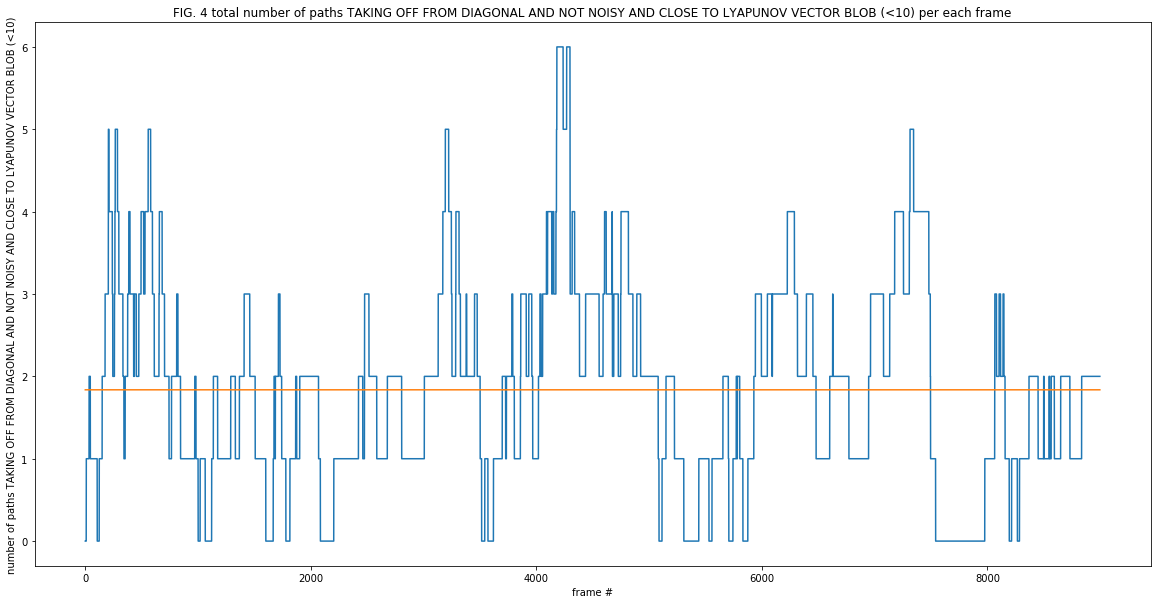

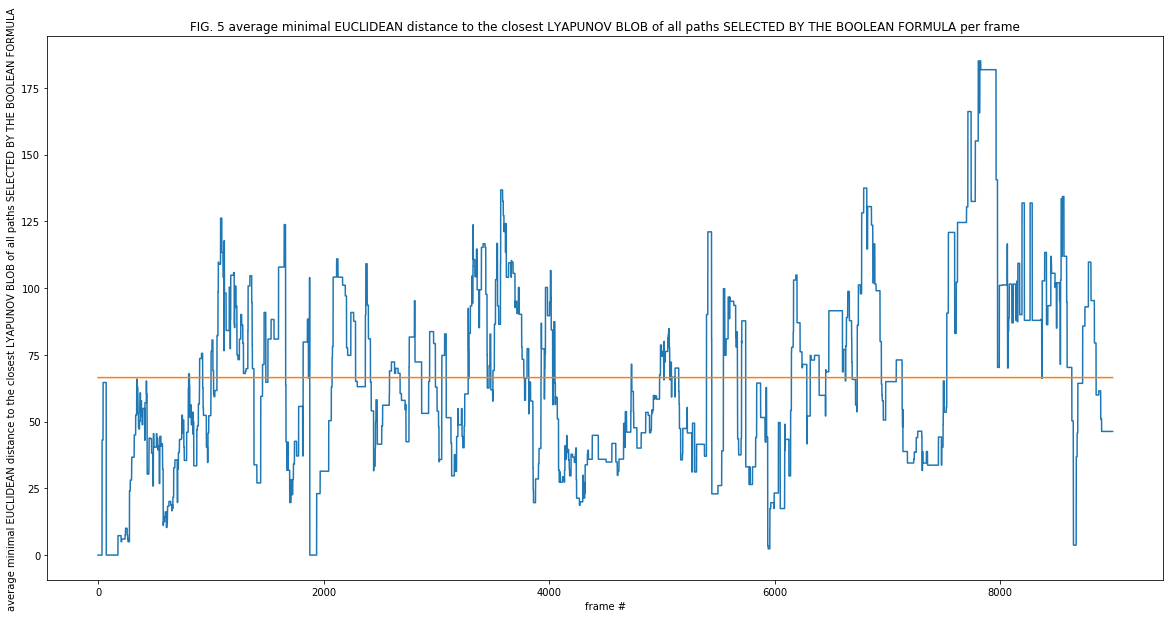

In [90]:
LEN = 8998
framecoverclose = np.zeros(LEN, dtype = float)
framesummindist = np.zeros(LEN, dtype = float)
frametotalsat = np.zeros(LEN, dtype = float)

for i in range(len(paths)):
    begin = paths[i][1]
    end = paths[i][2]
    pathlen = paths[i][2] - paths[i][1]
    fldist = (paths[i][ind('birth')][0]-paths[i][ind('birth')][-1])*(paths[i][ind('birth')][0]-paths[i][ind('birth')][-1]) + (paths[i][ind('death')][0]-paths[i][ind('death')][-1])*(paths[i][ind('death')][0]-paths[i][ind('death')][-1])    
    maxbirth = np.amax(paths[i][ind('birth')])
    mindeath = np.amin(paths[i][ind('death')])    
    sat = computesat(paths[i][ind('death')][0], paths[i][ind('birth')][0], paths[i][ind('death')][-1], paths[i][ind('birth')][-1], fldist, maxbirth, mindeath)    
    if( sat ):
        framesummindist[ begin : end ] += paths[i][18]
        frametotalsat[ begin : end ] += 1
    if( sat  and paths[i][19] > 5 ):
        framecoverclose[ begin : end ] += 1

avg = np.zeros( LEN, dtype=float)
avg.fill(np.average(framecoverclose))
pyp.figure( figsize=(20,10) )
pyp.title('FIG. 4 total number of paths TAKING OFF FROM DIAGONAL AND NOT NOISY AND CLOSE TO LYAPUNOV VECTOR BLOB (<10) per each frame')
pyp.xlabel('frame #')
pyp.ylabel('number of paths TAKING OFF FROM DIAGONAL AND NOT NOISY AND CLOSE TO LYAPUNOV VECTOR BLOB (<10)')
pyp.plot(range(LEN), framecoverclose, range(LEN), avg)
pyp.show()

frametotalsat2 = [(x if x>0 else 1) for x in frametotalsat]

avg = np.zeros( LEN, dtype=float)
avg.fill(np.average(framesummindist / frametotalsat2))
pyp.figure( figsize=(20,10) )
pyp.title('FIG. 5 average minimal EUCLIDEAN distance to the closest LYAPUNOV BLOB of all paths SELECTED BY THE BOOLEAN FORMULA per frame')
pyp.xlabel('frame #')
pyp.ylabel('average minimal EUCLIDEAN distance to the closest LYAPUNOV BLOB of all paths SELECTED BY THE BOOLEAN FORMULA')
pyp.plot(range(LEN), framesummindist / frametotalsat2, range(LEN), avg)
pyp.show()


In [91]:
print('Probability that at an instant of time there is at least one \'arch\' CLOSE TO high Lyapunov vector BLOB')
print( (str)(len( [x for x in framecoverclose if x > 0] ) / len( framecoverclose )) ) 

Probability that at an instant of time there is at least one 'arch' CLOSE TO high Lyapunov vector BLOB
0.8728606356968215


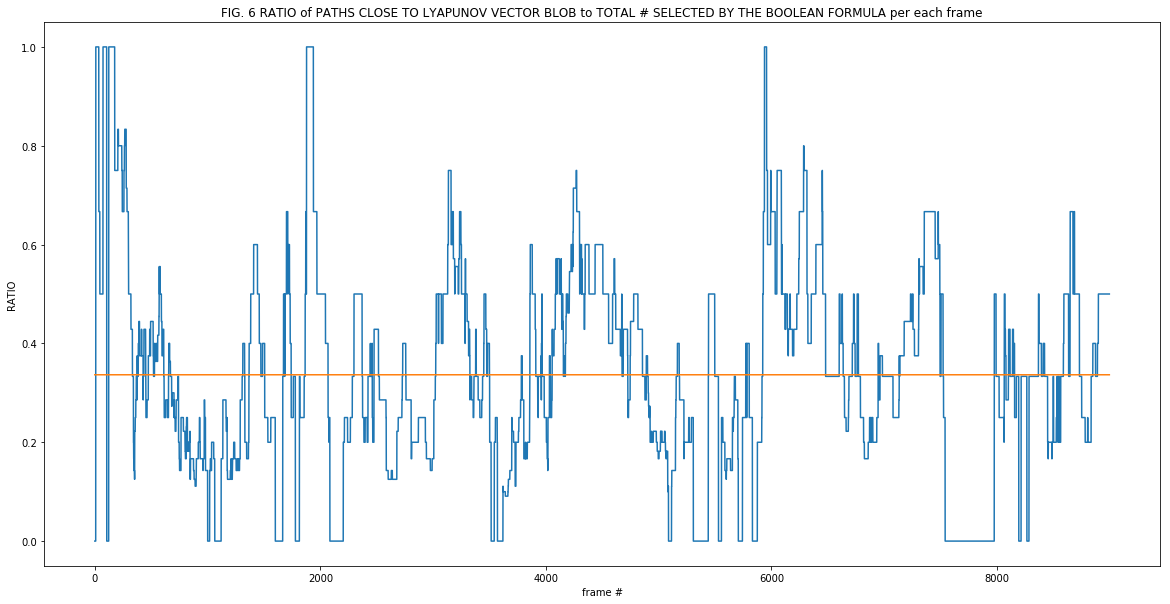

In [92]:
ratio = framecoverclose / np.array([x if x>0 else 1 for x in framecoverall])
avg = np.zeros( LEN, dtype=float)
avg.fill(np.average(ratio))
pyp.figure( figsize=(20,10) )
    pyp.title('FIG. 6 RATIO of PATHS CLOSE TO LYAPUNOV VECTOR BLOB to TOTAL # SELECTED BY THE BOOLEAN FORMULA per each frame')
pyp.xlabel('frame #')
pyp.ylabel('RATIO')
pyp.plot(range(LEN), ratio, range(LEN), avg)
pyp.show()

In [83]:
print('AVERAGE RATIO of PATHS PICKING UP HIGH LYAPUNOV VECTOR to SELECTED BY THE BOOLEAN FORMULA per each frame')
print(np.average(ratio))

AVERAGE RATIO of PATHS PICKING UP HIGH LYAPUNOV VECTOR to SELECTED BY THE BOOLEAN FORMULA per each frame
0.336556270839


In [84]:
print('RATIO OF "FALSE POSITIVES"')
print(1- np.average(ratio))

RATIO OF "FALSE POSITIVES"
0.663443729161


OUTPUT OF ALL PATHS SELECTED BY THE BOOLEAN FORMULA 


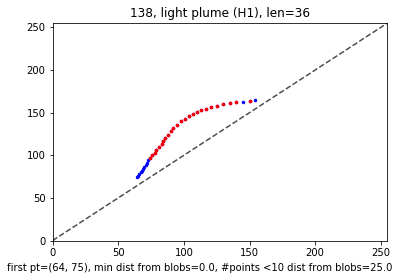

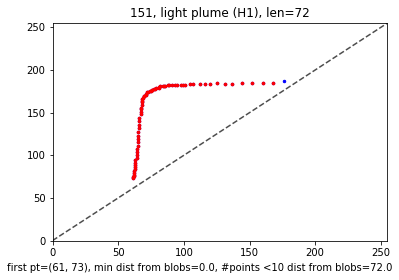

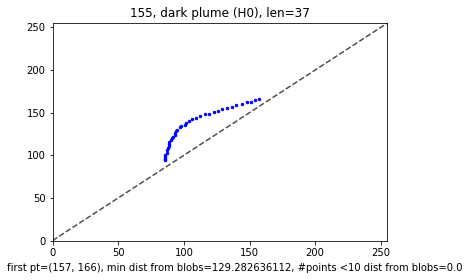

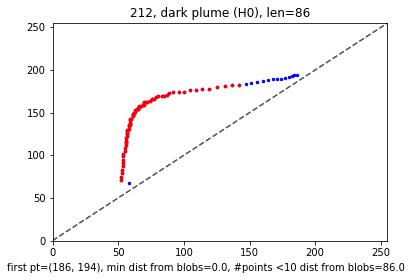

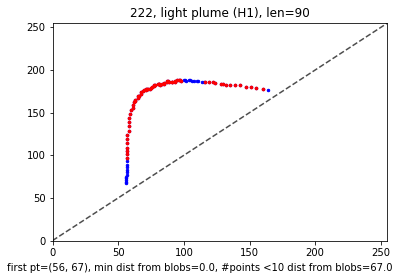

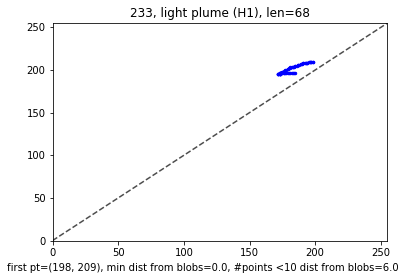

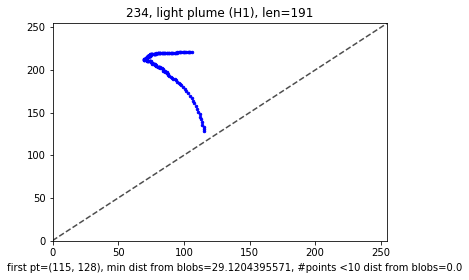

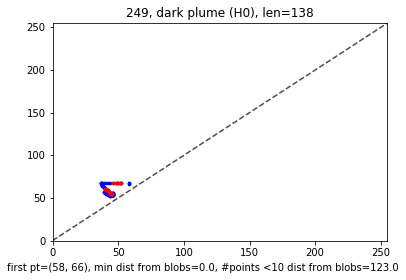

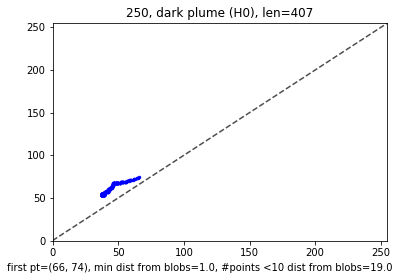

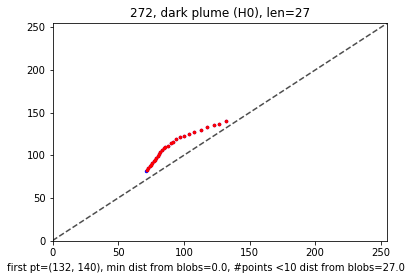

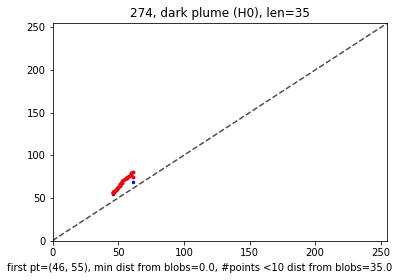

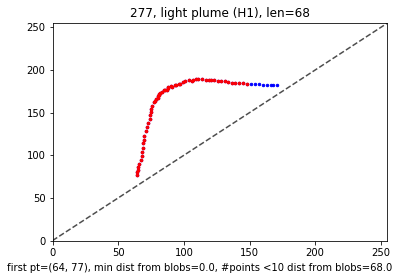

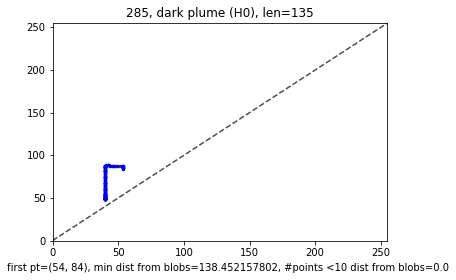

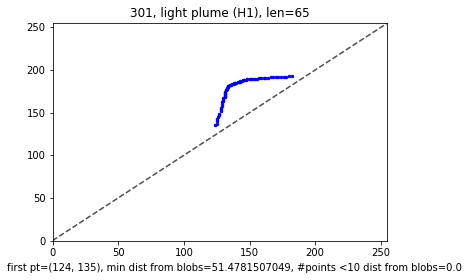

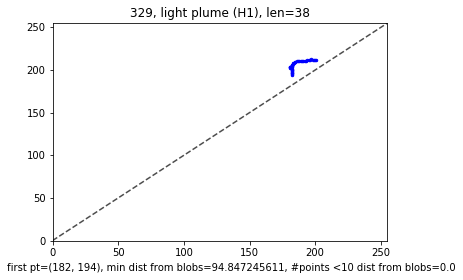

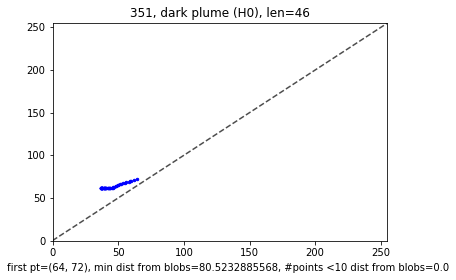

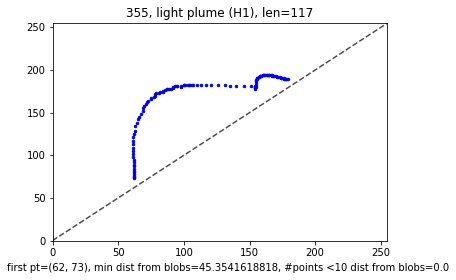

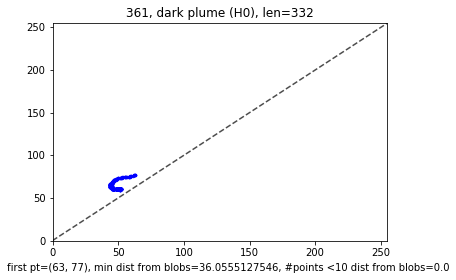

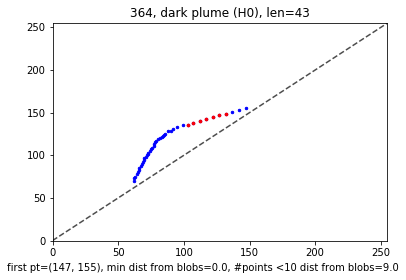

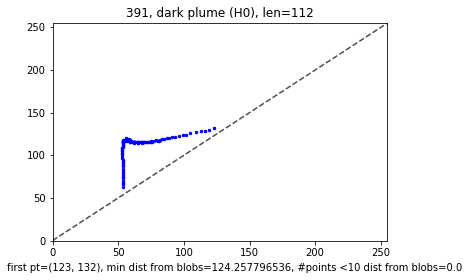

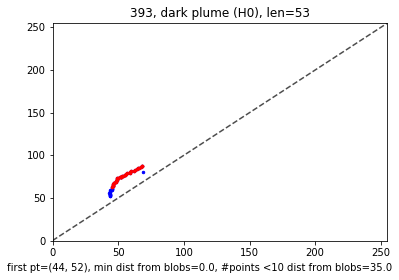

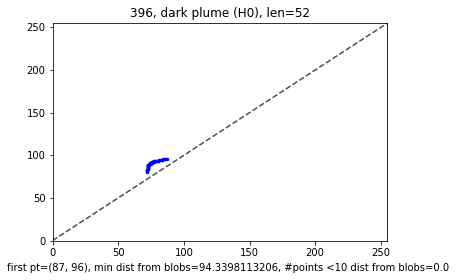

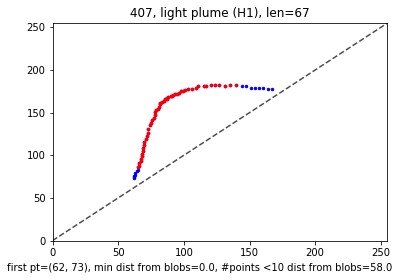

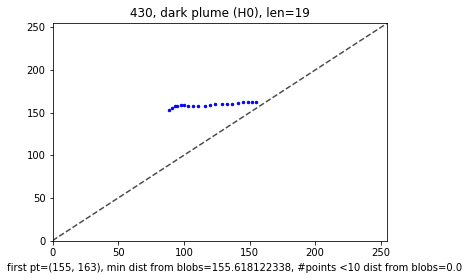

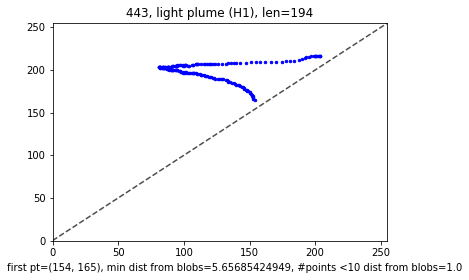

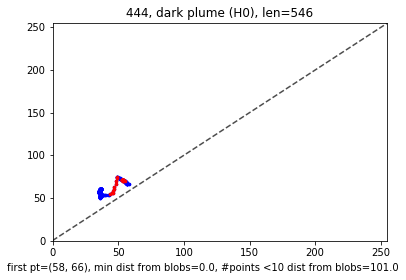

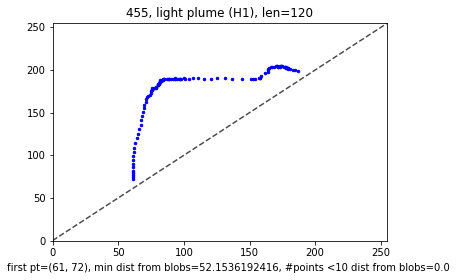

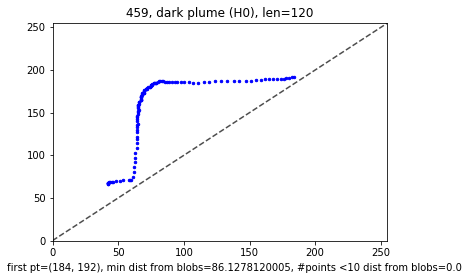

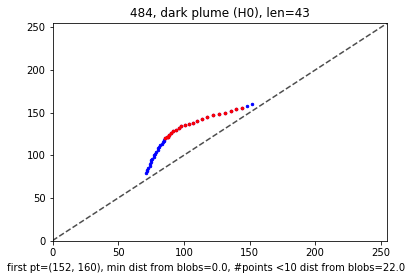

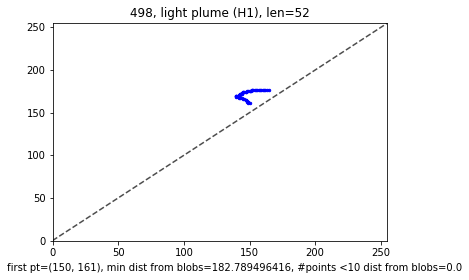

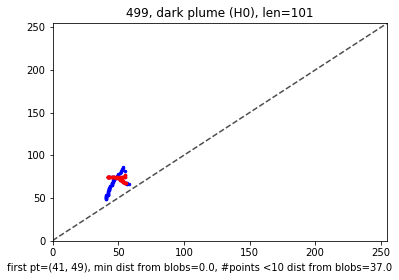

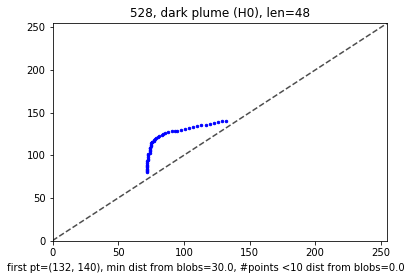

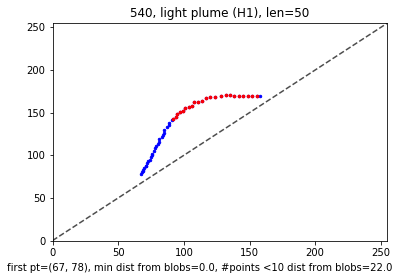

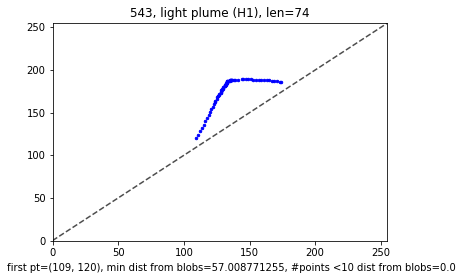

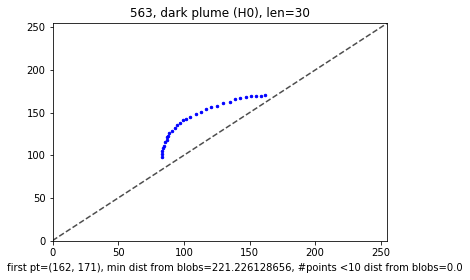

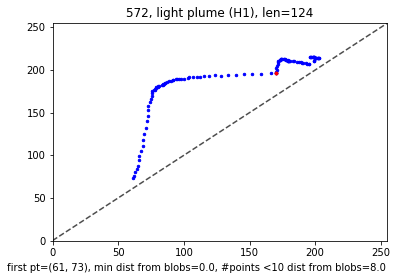

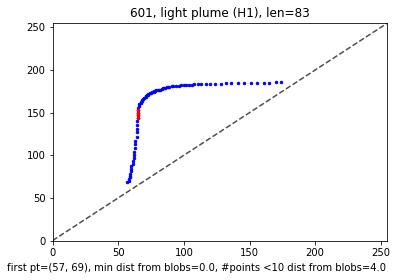

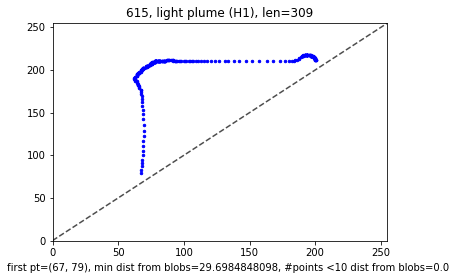

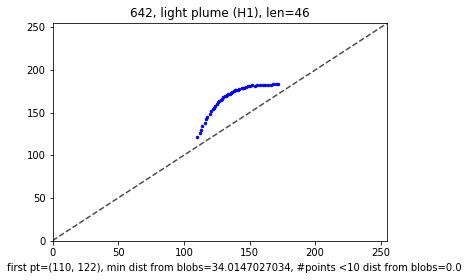

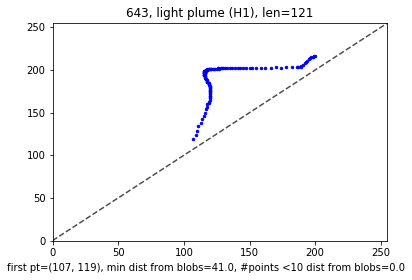

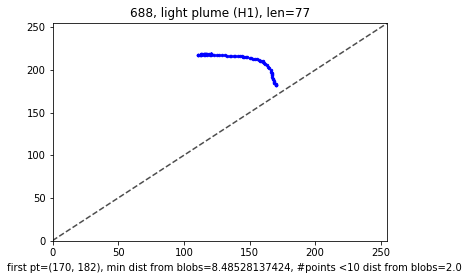

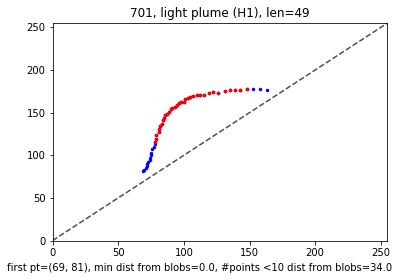

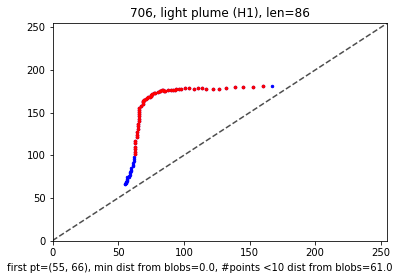

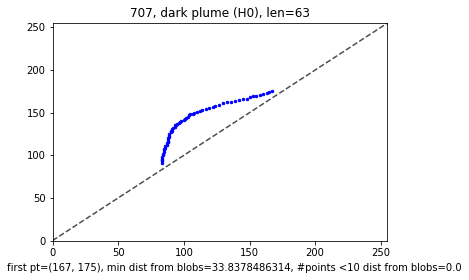

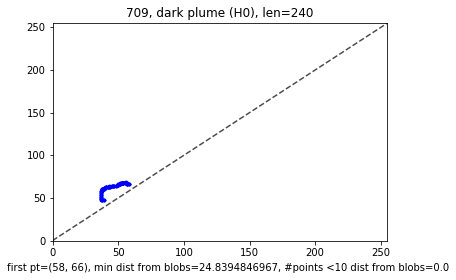

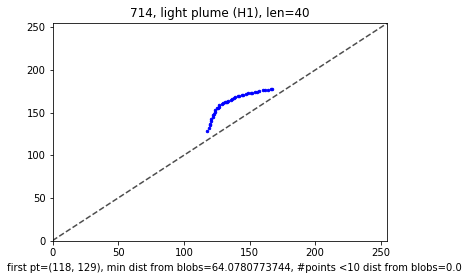

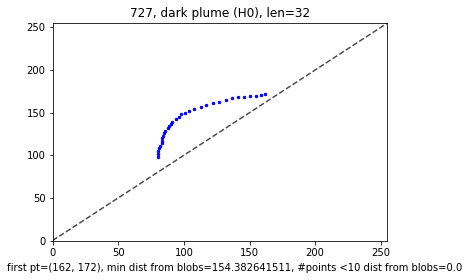

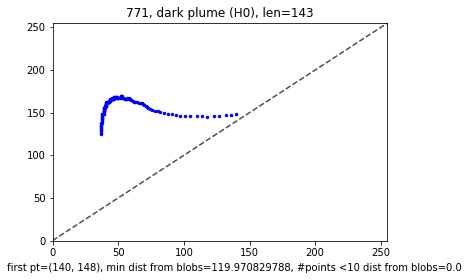

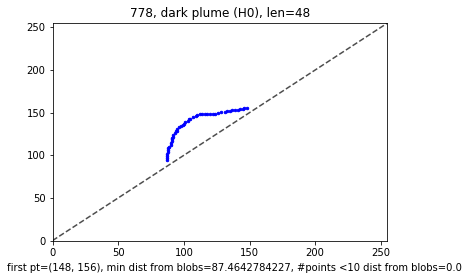

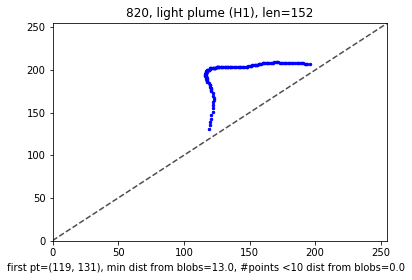

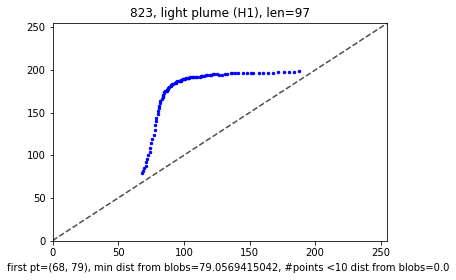

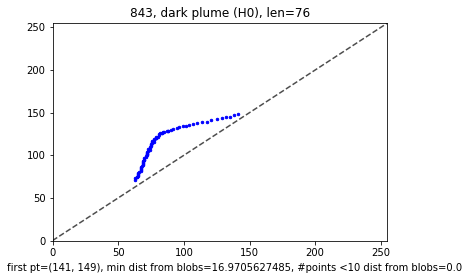

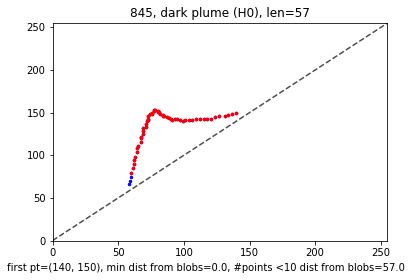

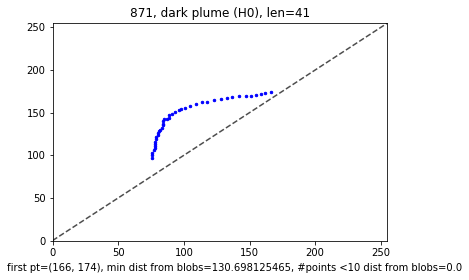

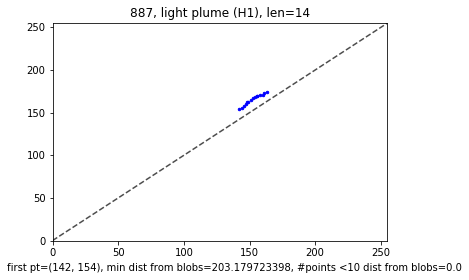

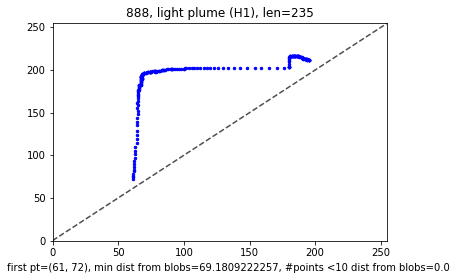

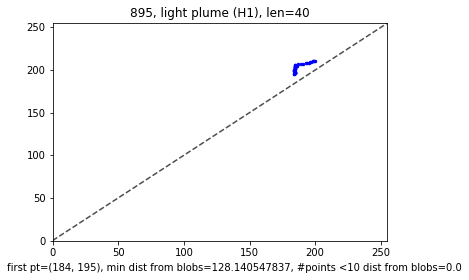

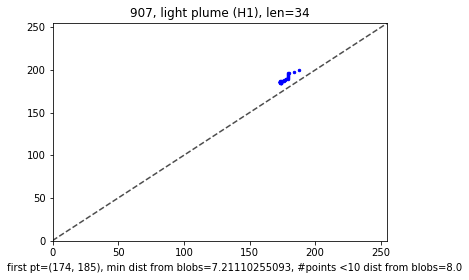

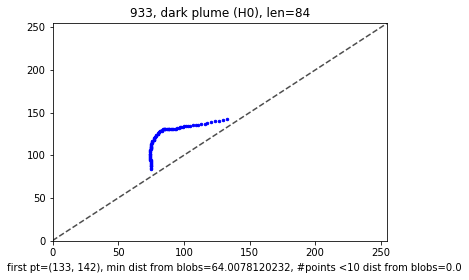

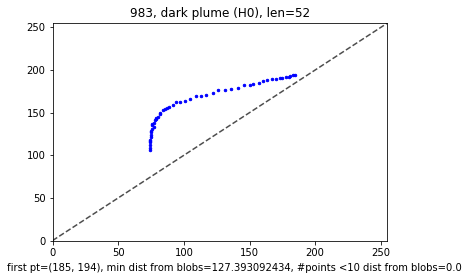

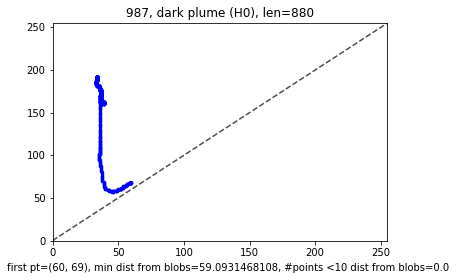

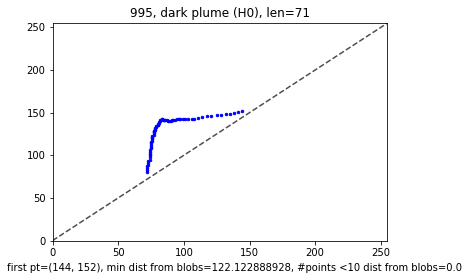

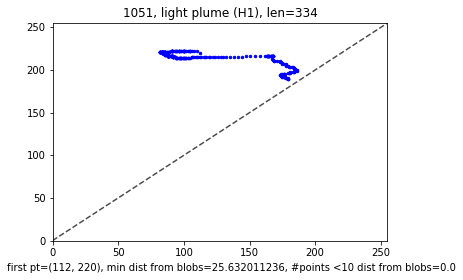

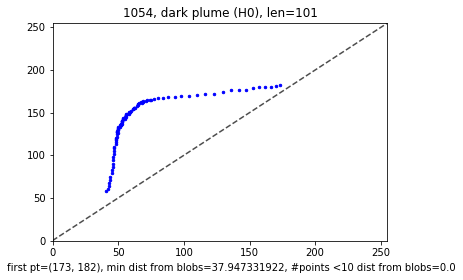

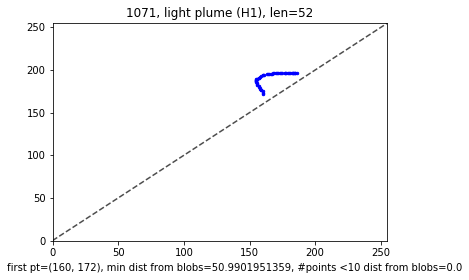

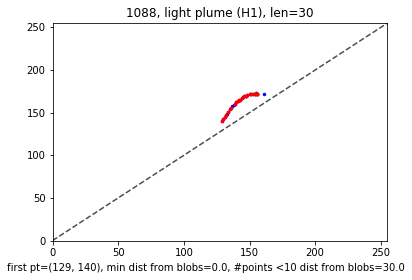

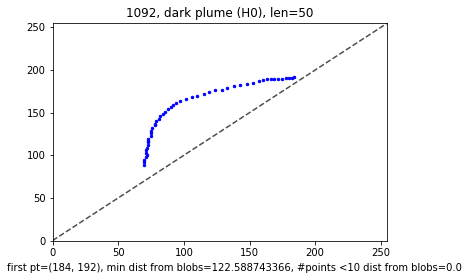

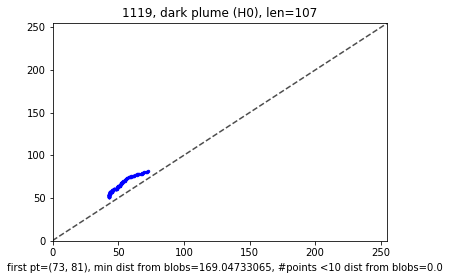

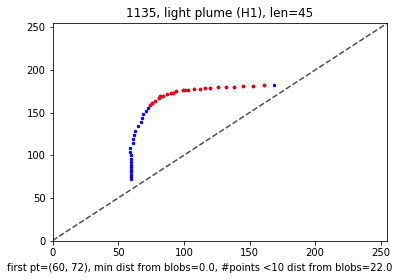

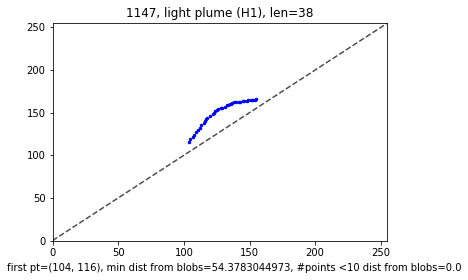

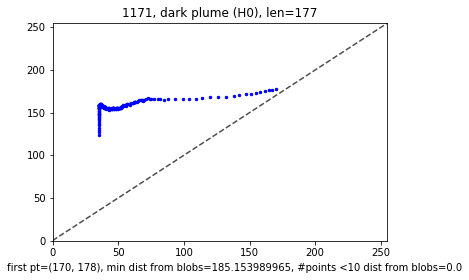

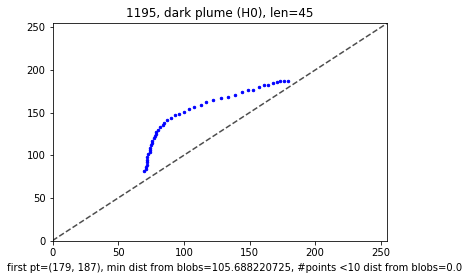

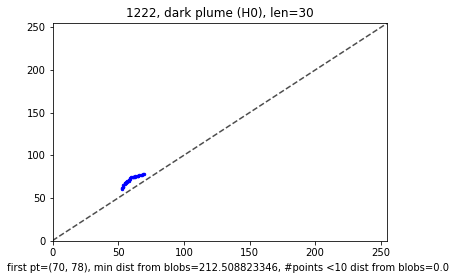

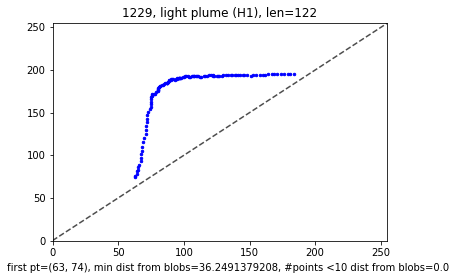

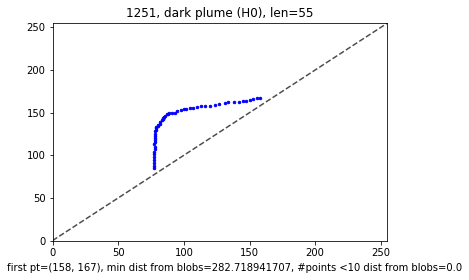

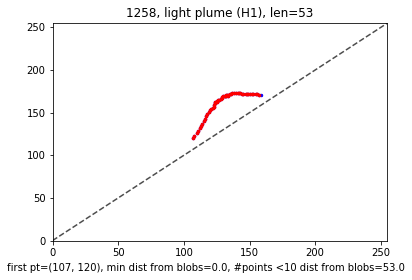

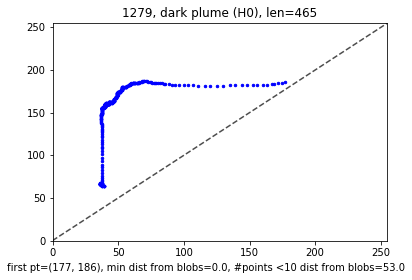

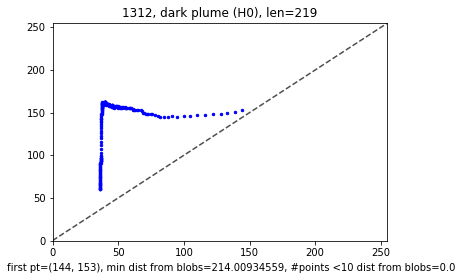

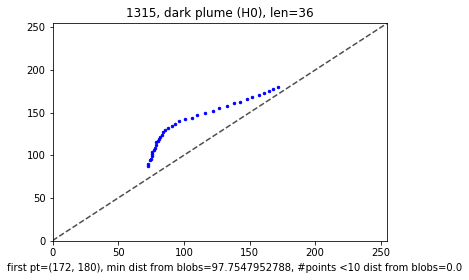

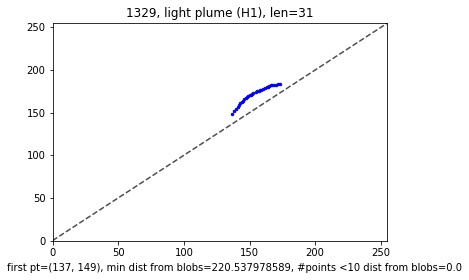

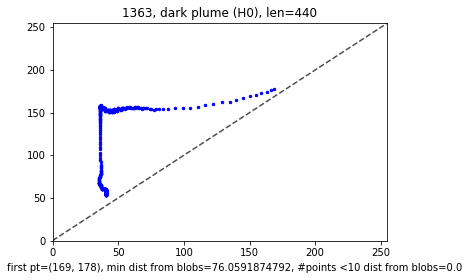

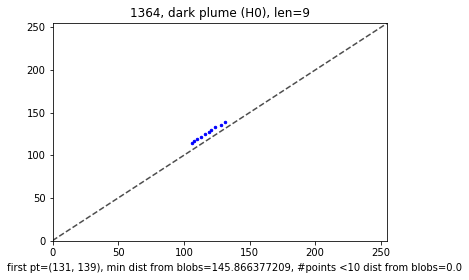

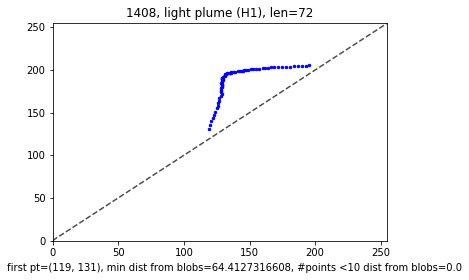

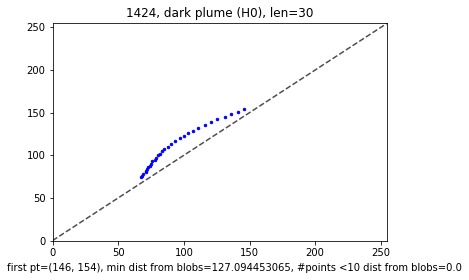

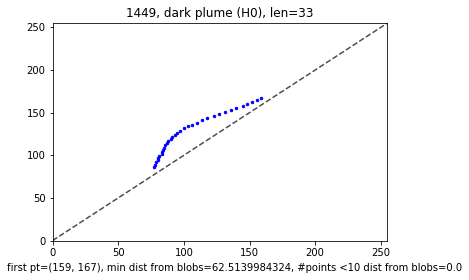

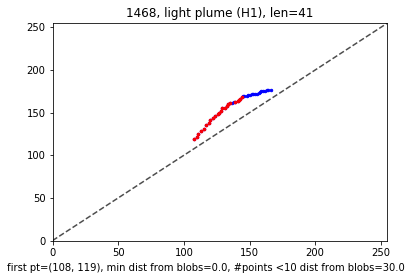

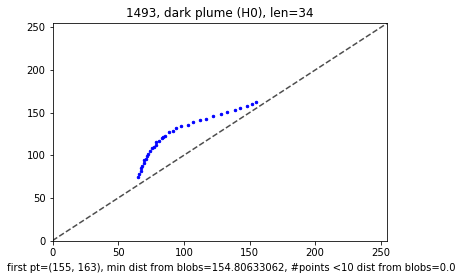

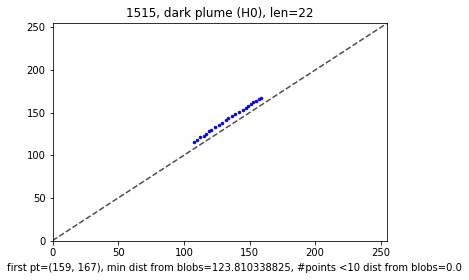

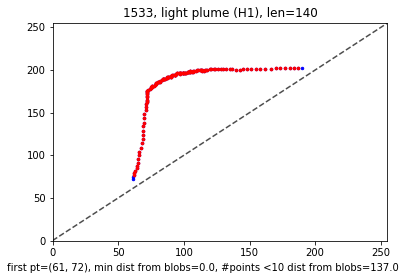

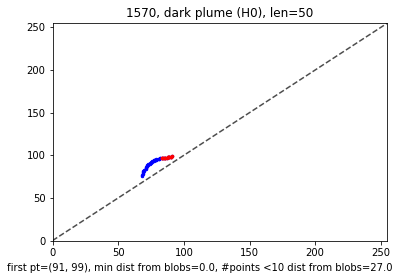

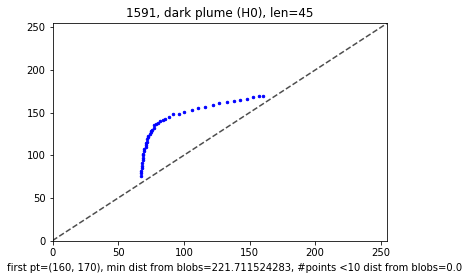

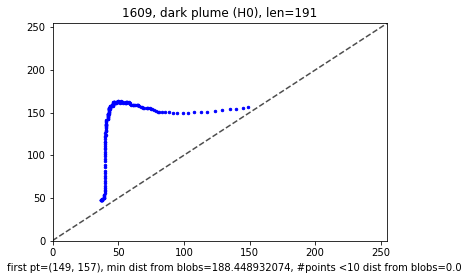

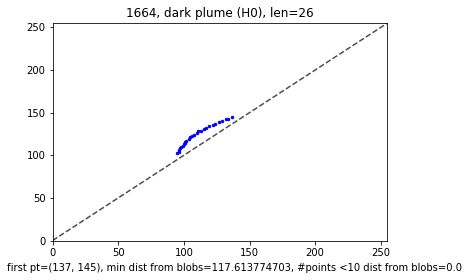

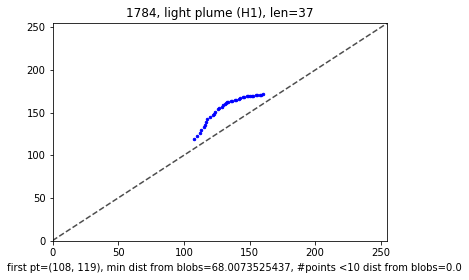

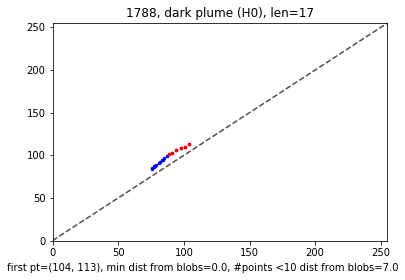

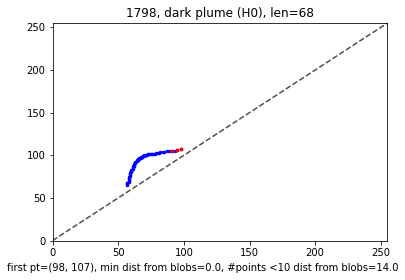

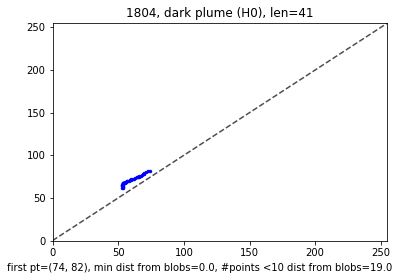

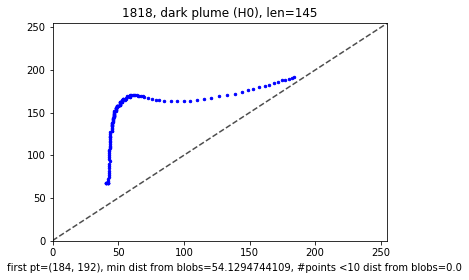

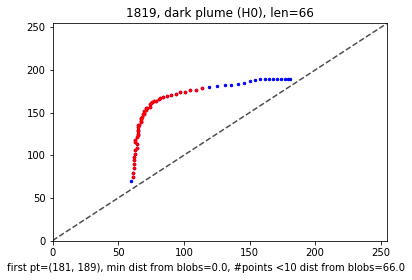

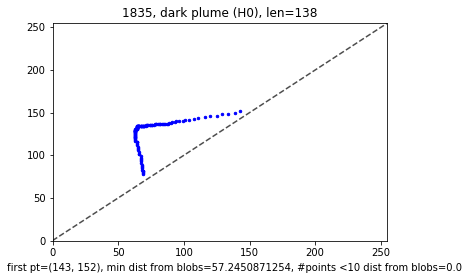

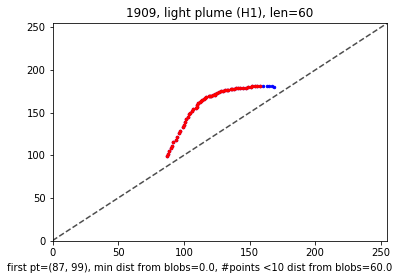

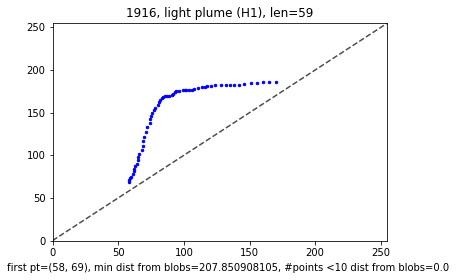

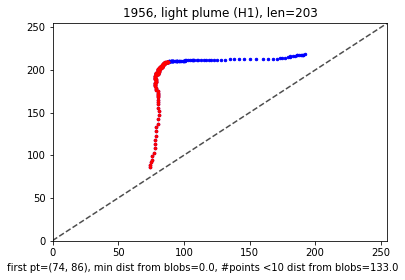

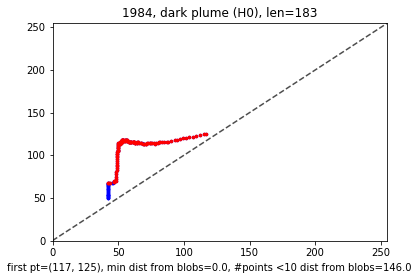

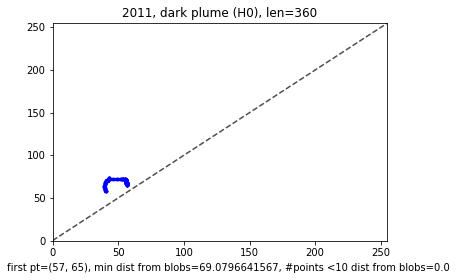

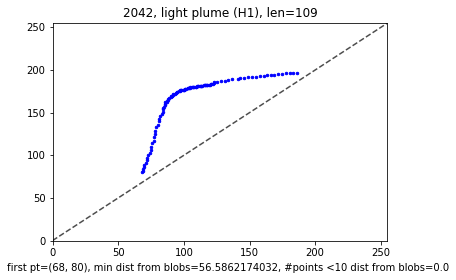

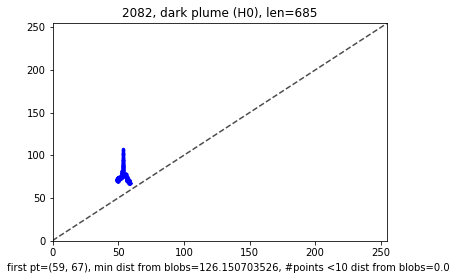

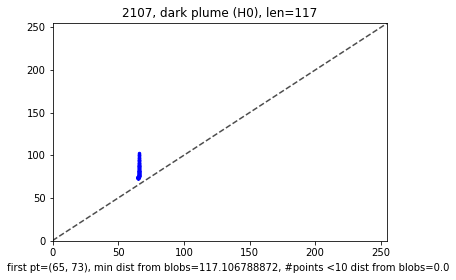

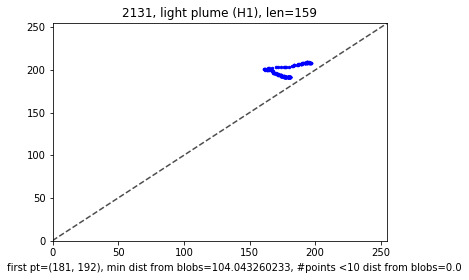

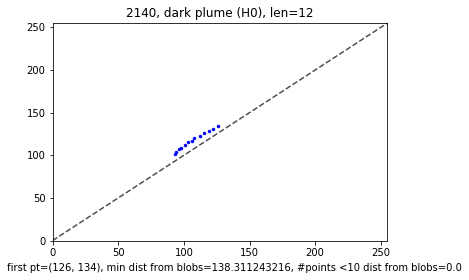

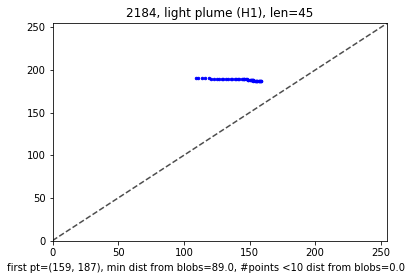

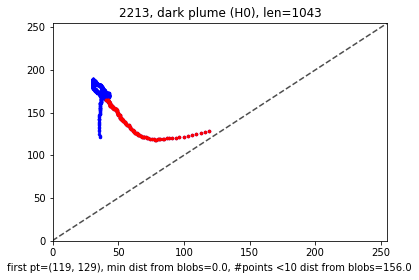

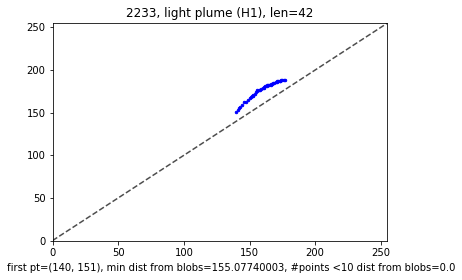

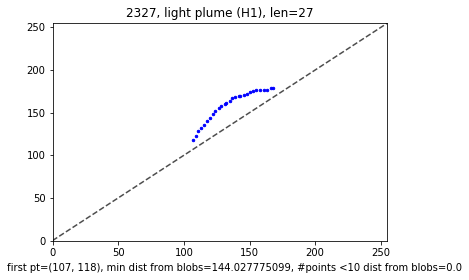

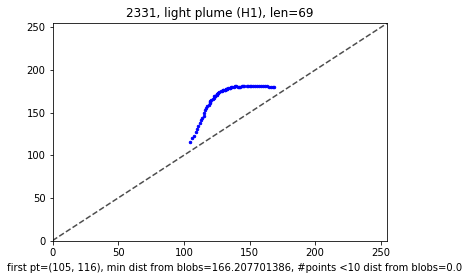

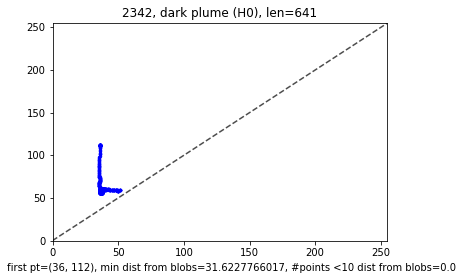

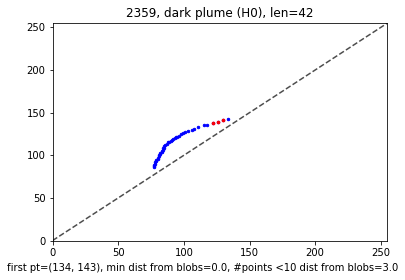

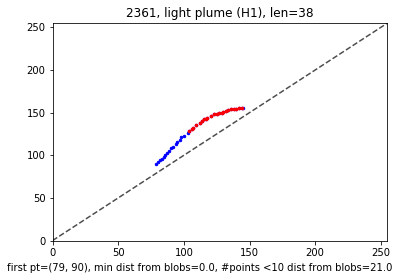

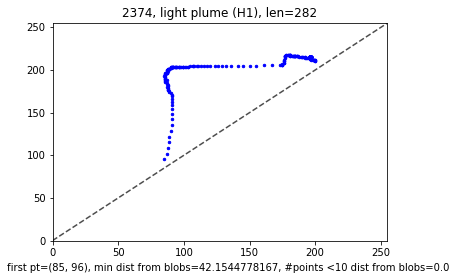

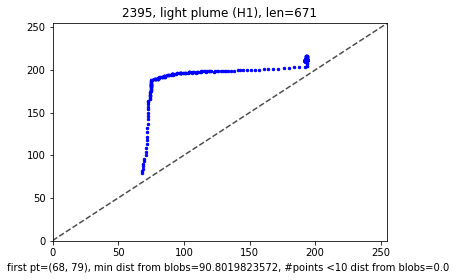

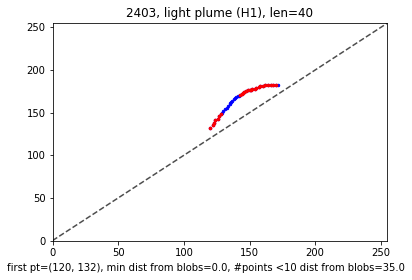

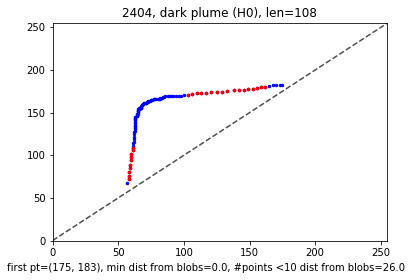

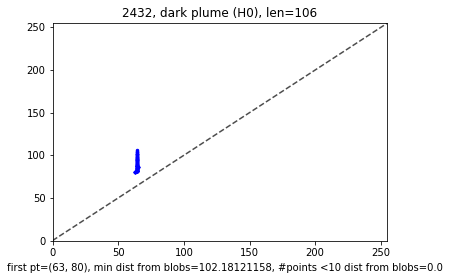

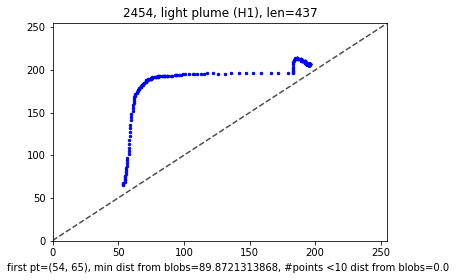

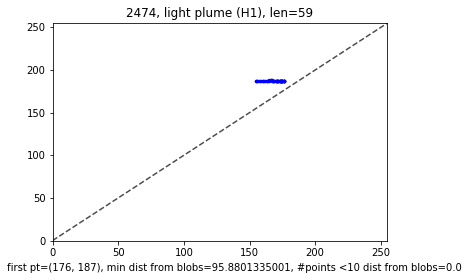

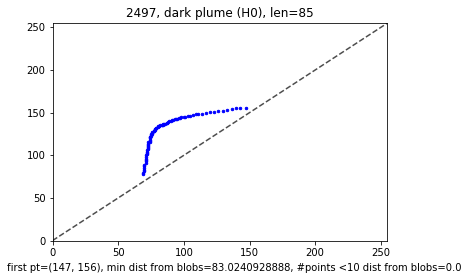

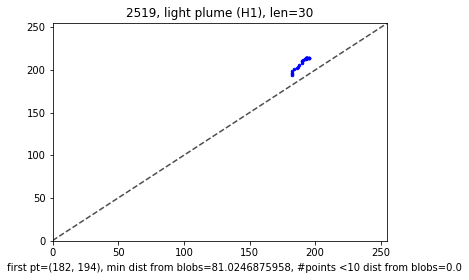

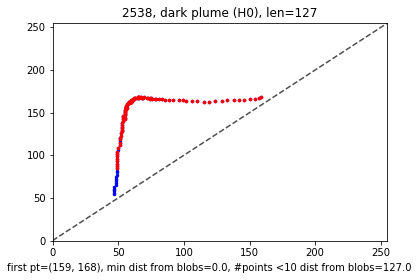

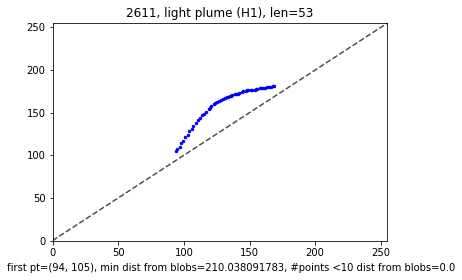

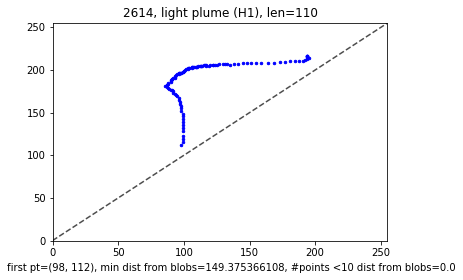

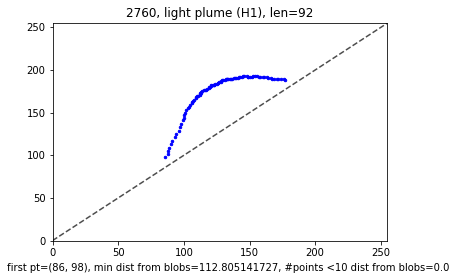

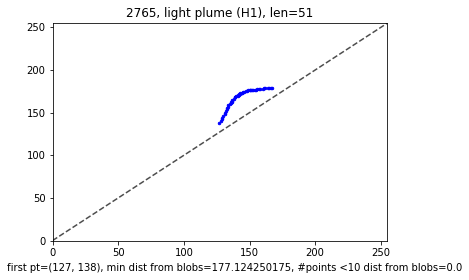

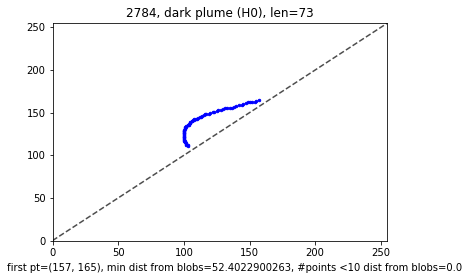

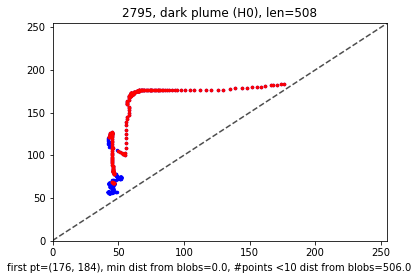

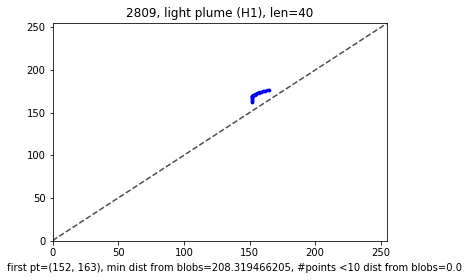

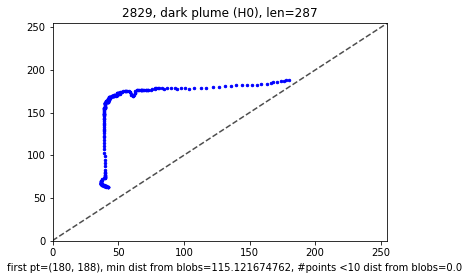

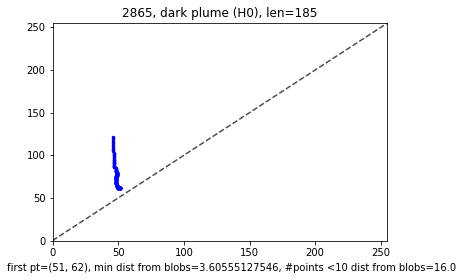

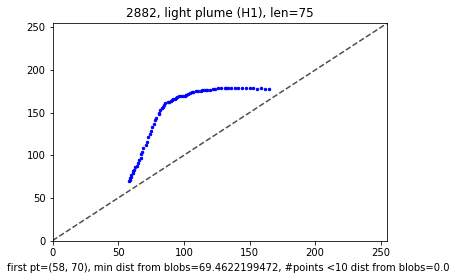

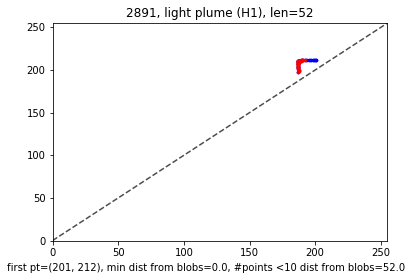

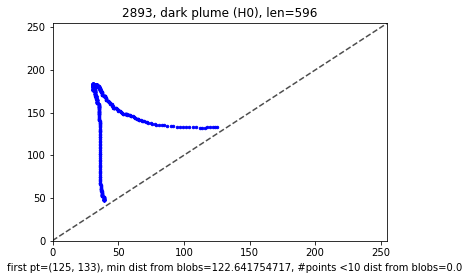

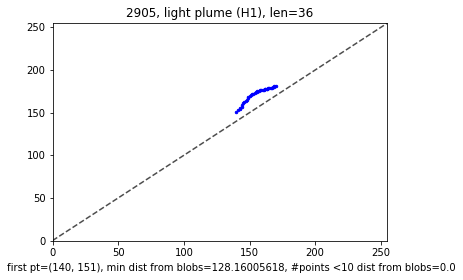

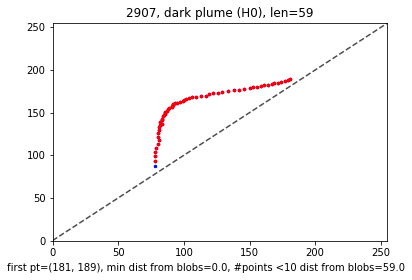

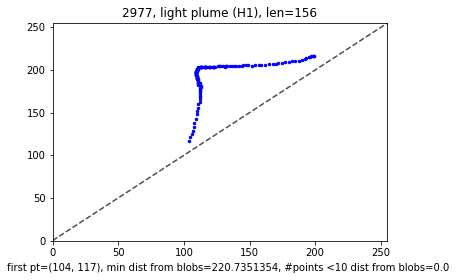

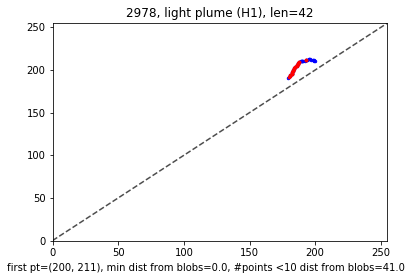

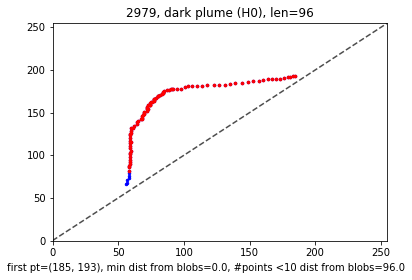

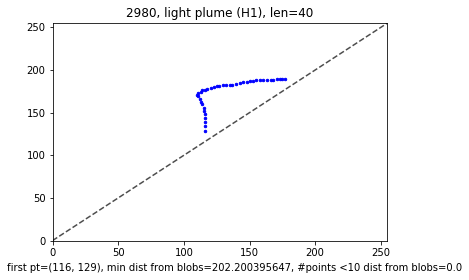

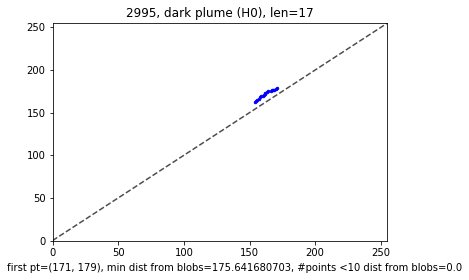

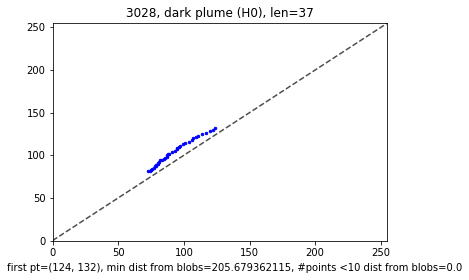

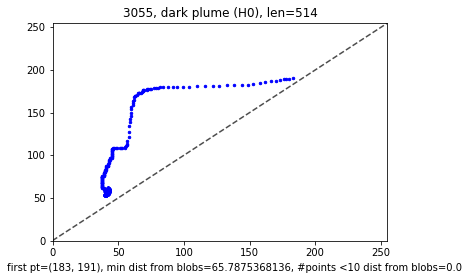

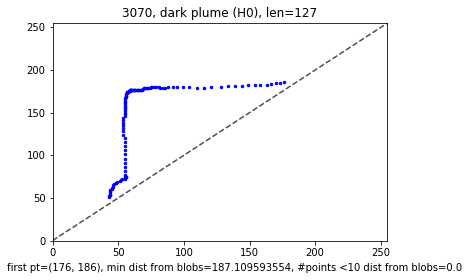

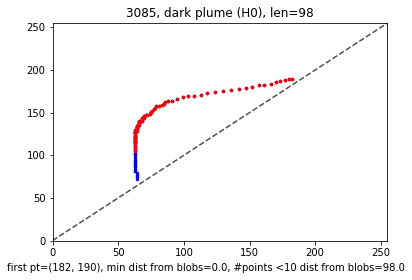

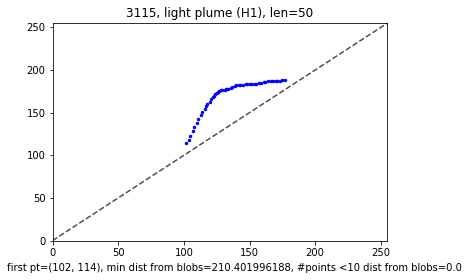

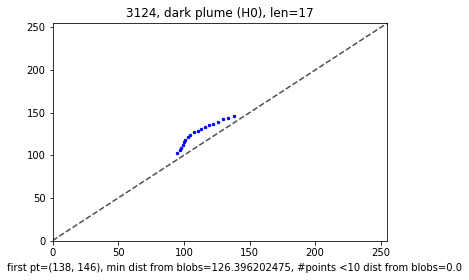

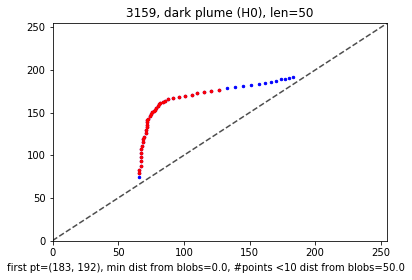

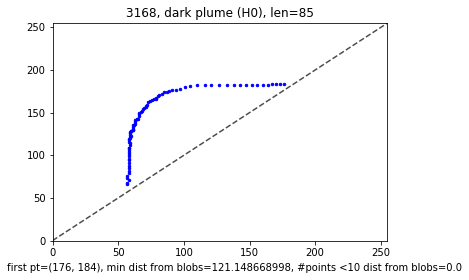

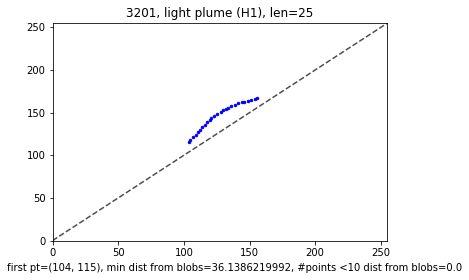

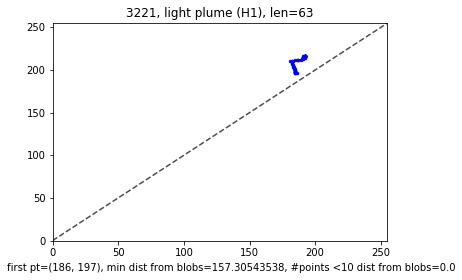

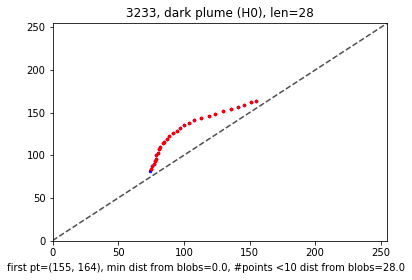

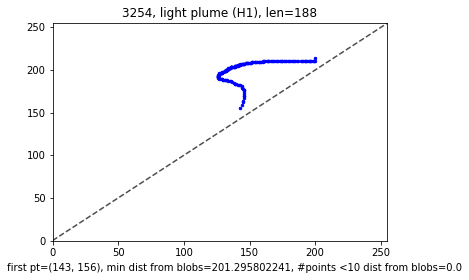

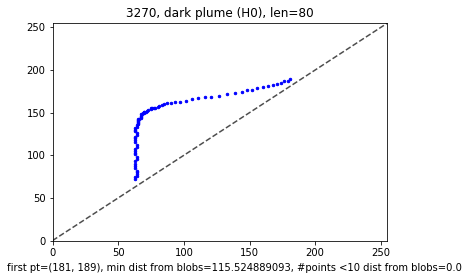

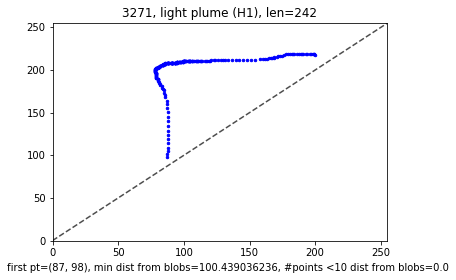

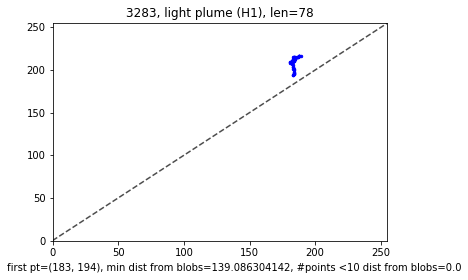

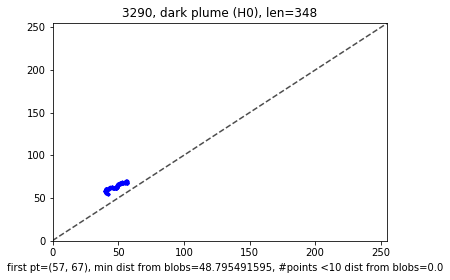

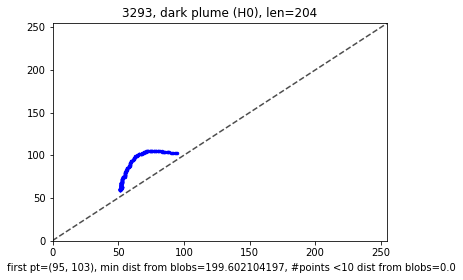

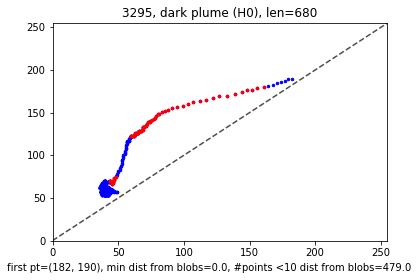

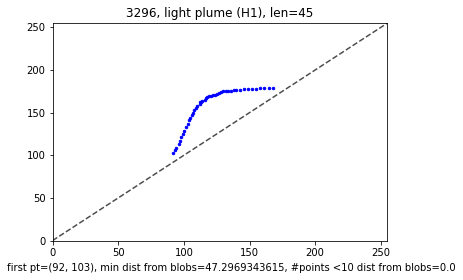

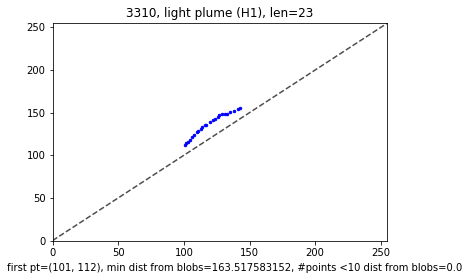

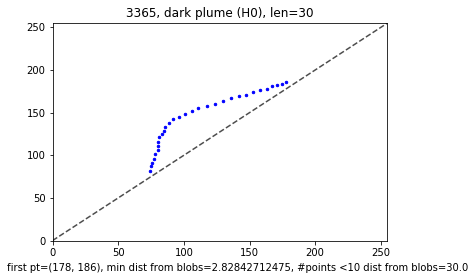

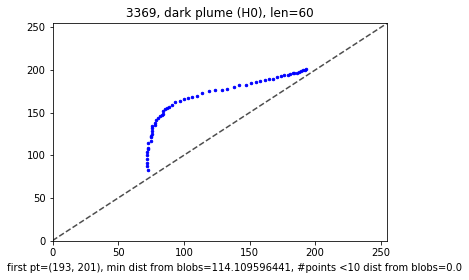

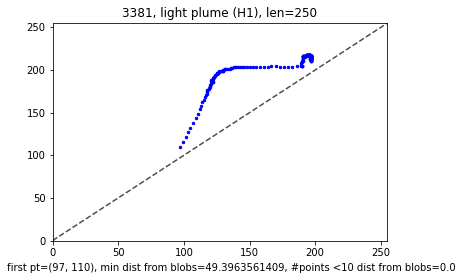

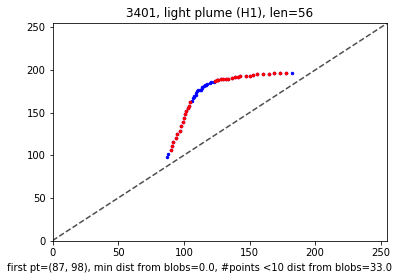

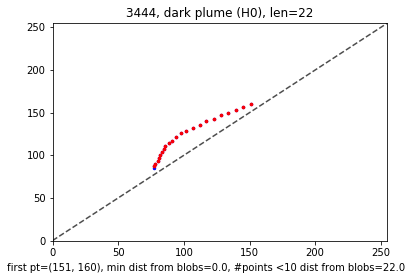

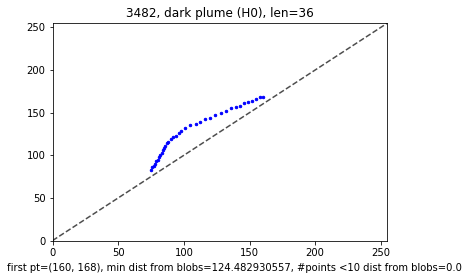

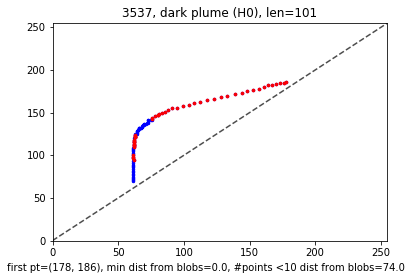

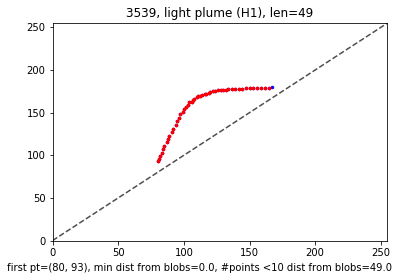

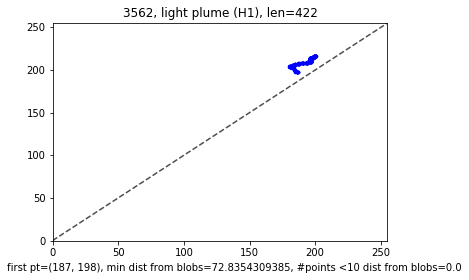

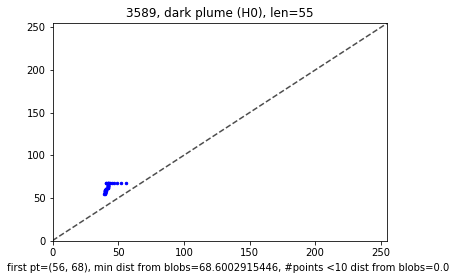

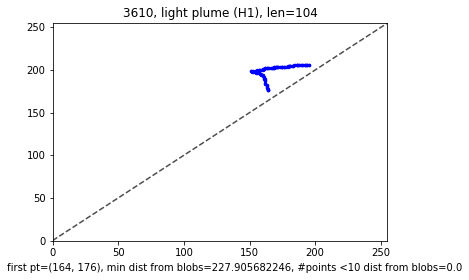

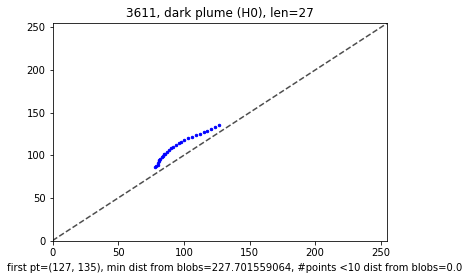

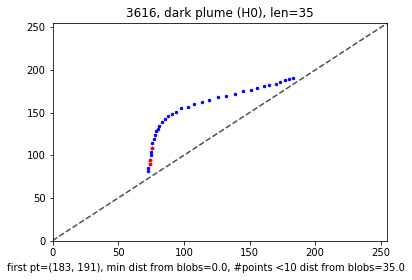

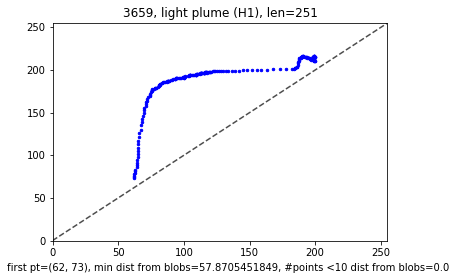

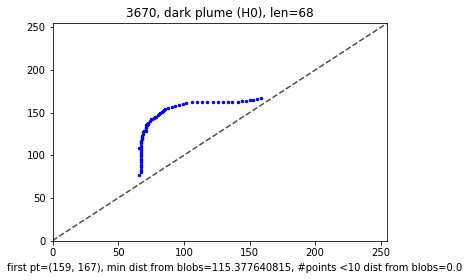

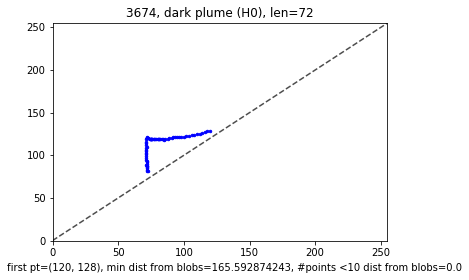

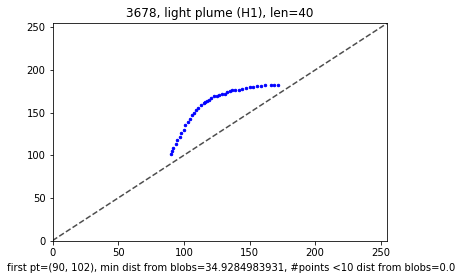

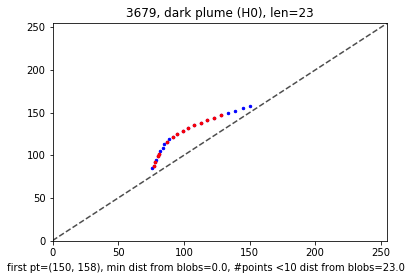

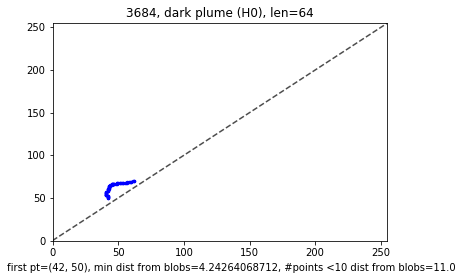

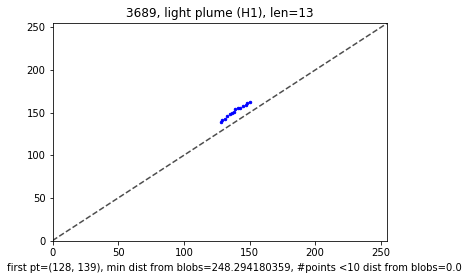

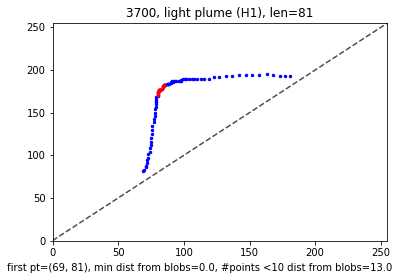

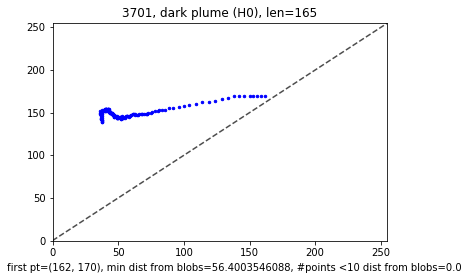

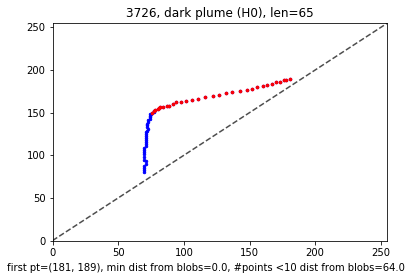

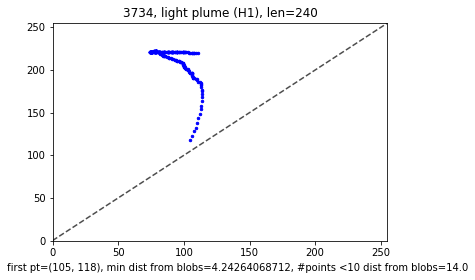

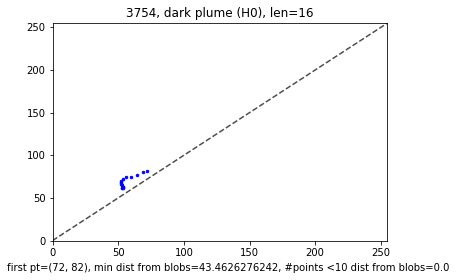

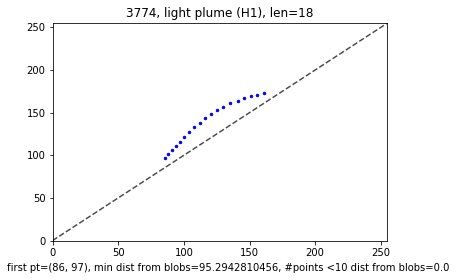

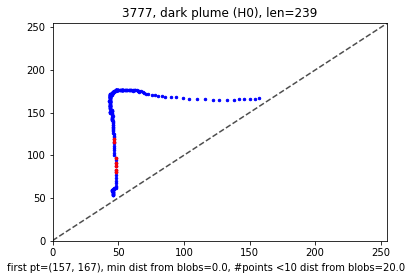

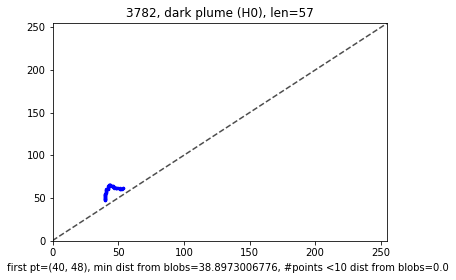

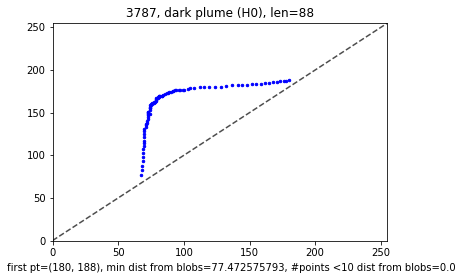

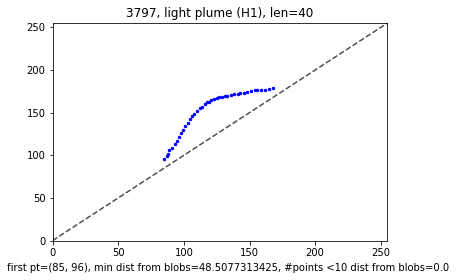

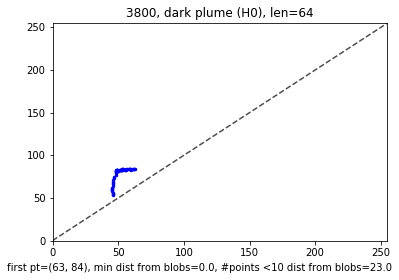

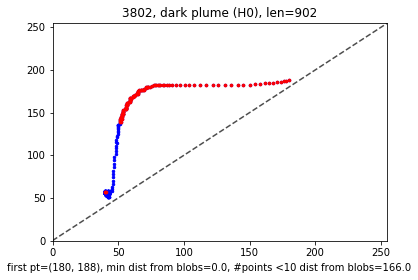

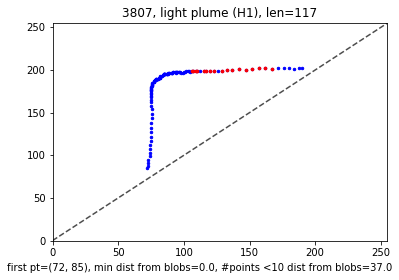

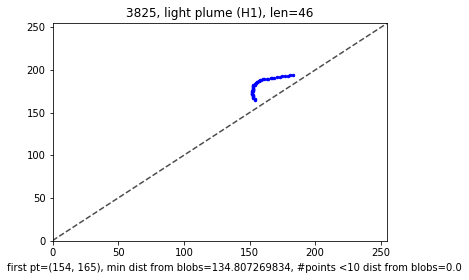

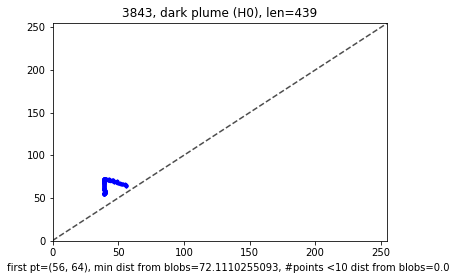

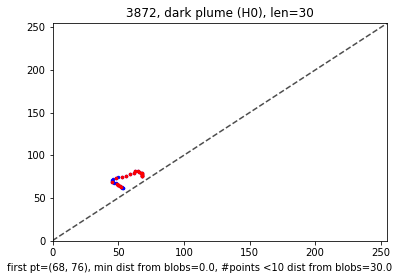

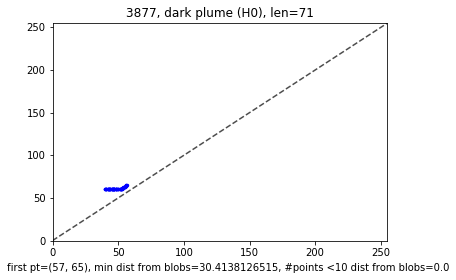

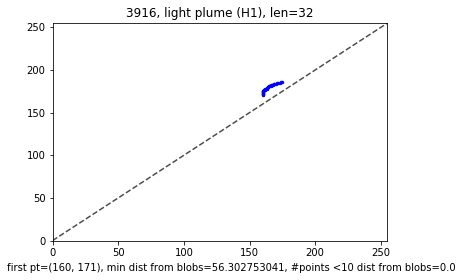

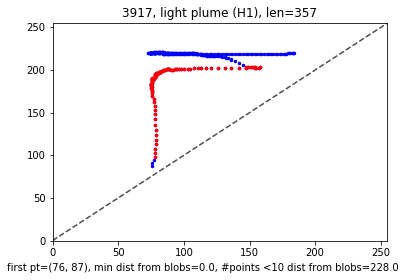

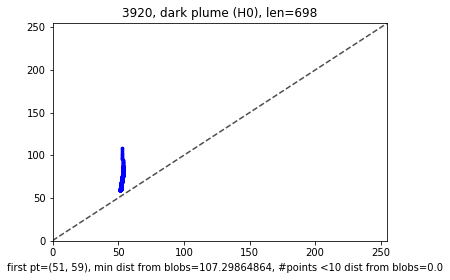

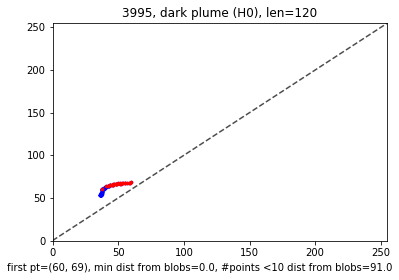

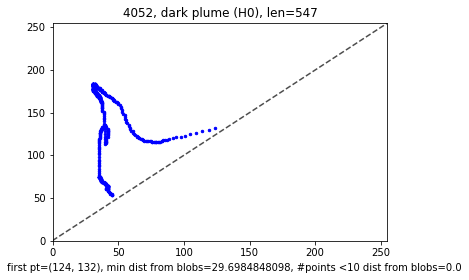

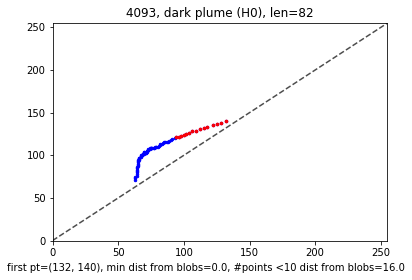

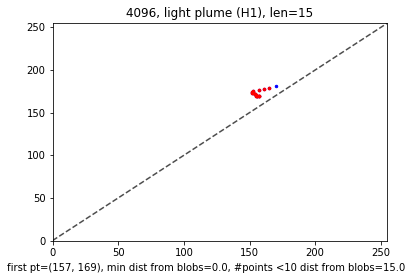

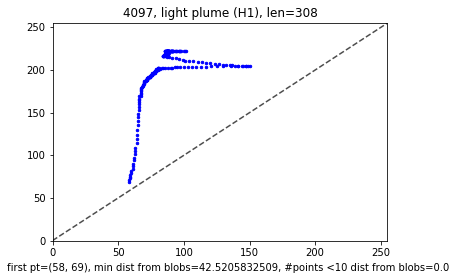

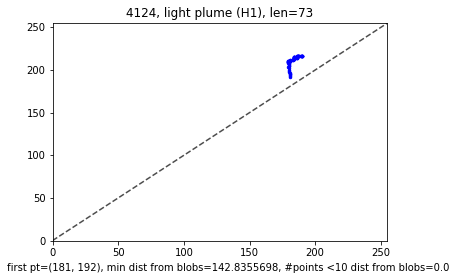

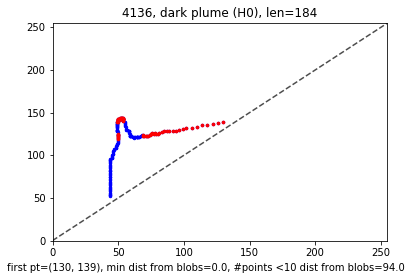

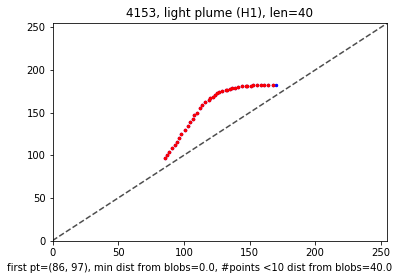

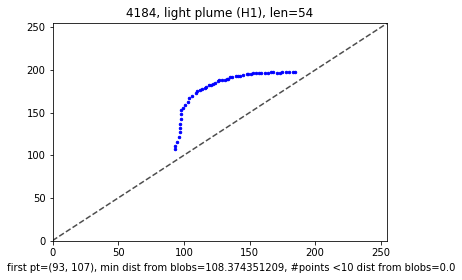

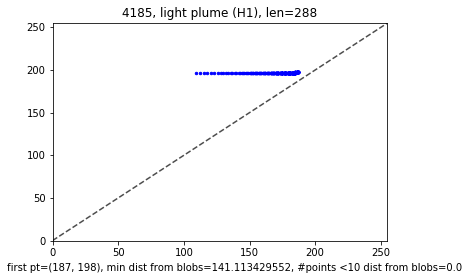

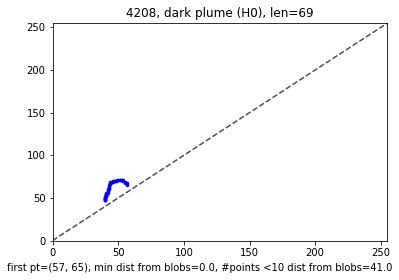

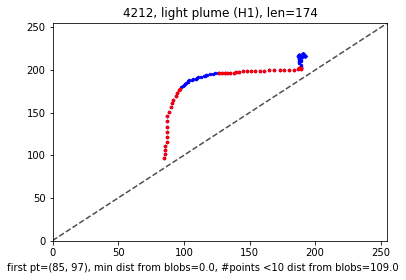

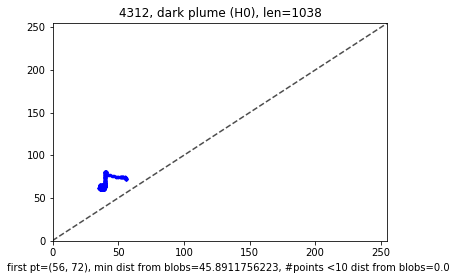

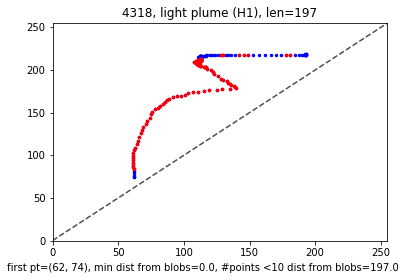

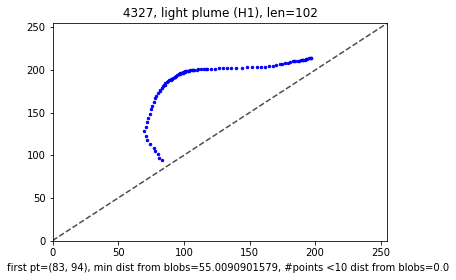

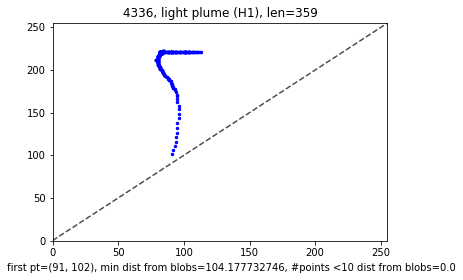

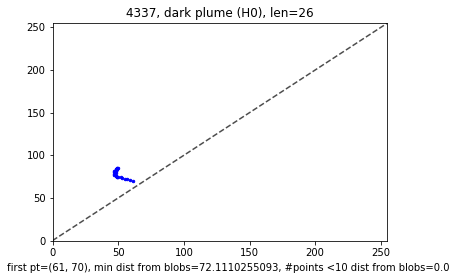

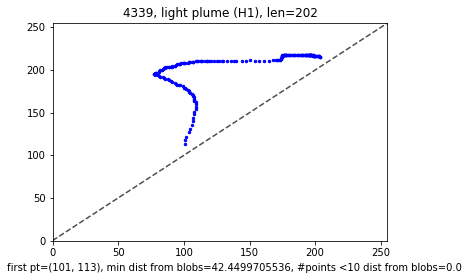

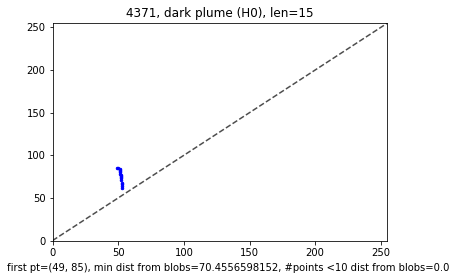

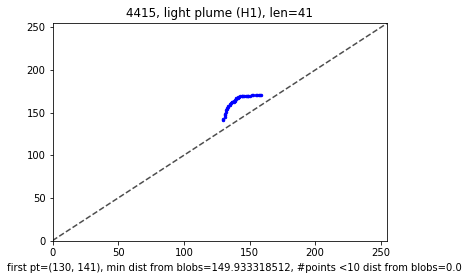

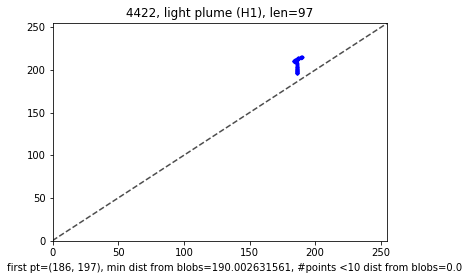

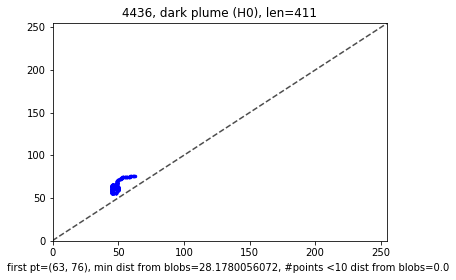

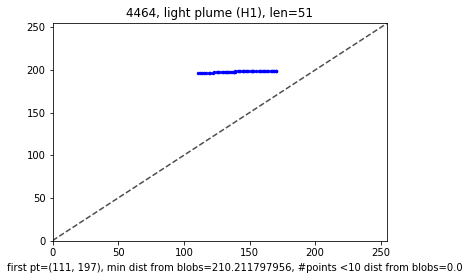

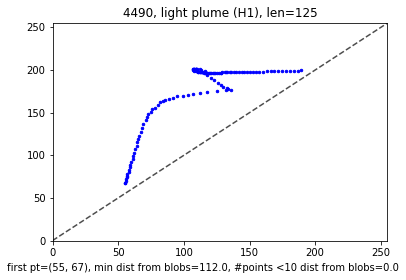

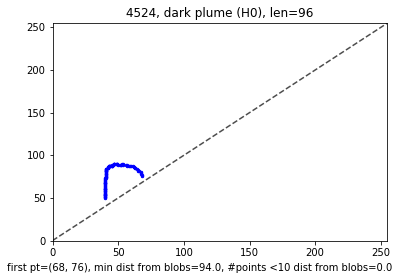

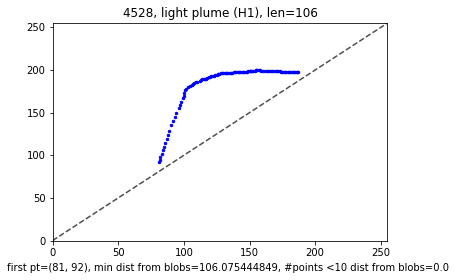

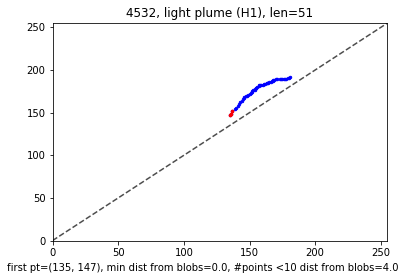

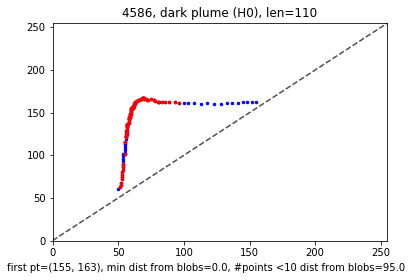

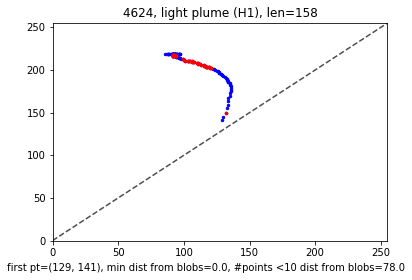

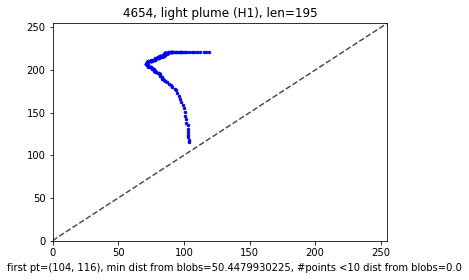

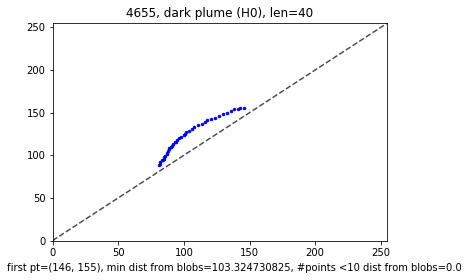

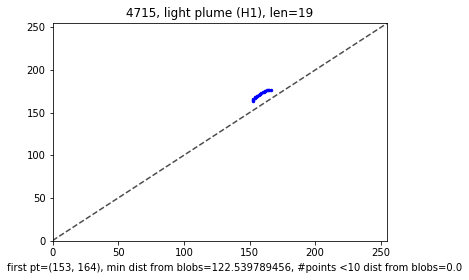

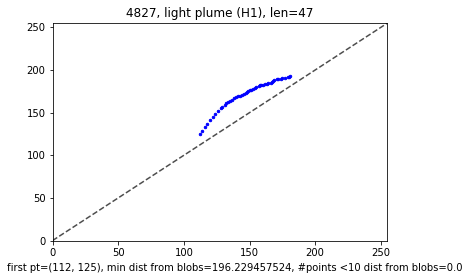

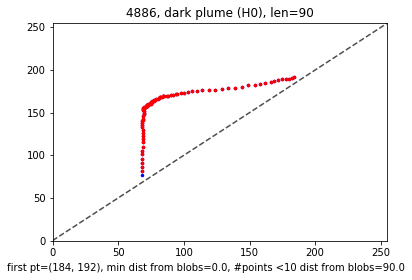

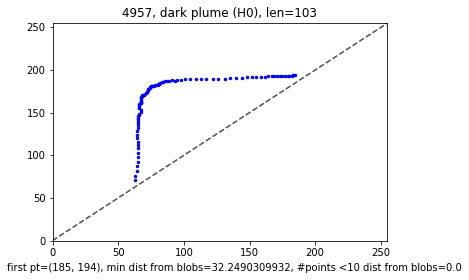

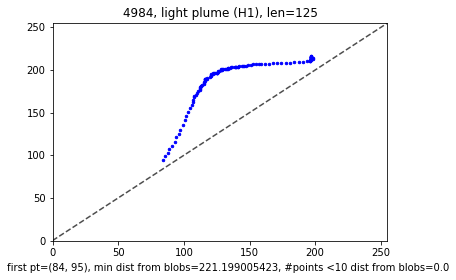

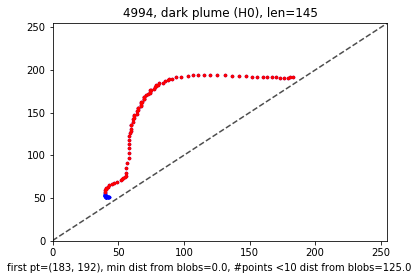

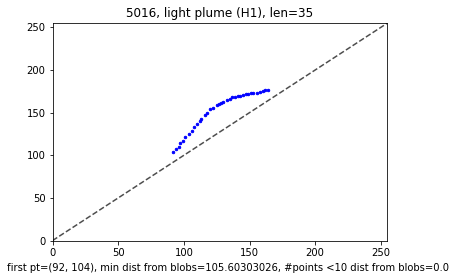

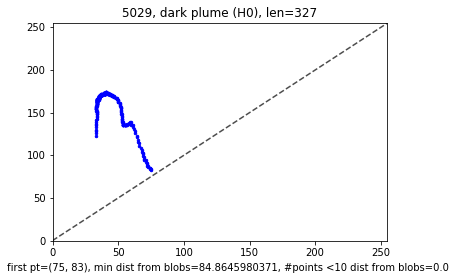

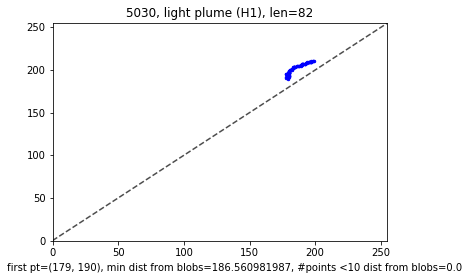

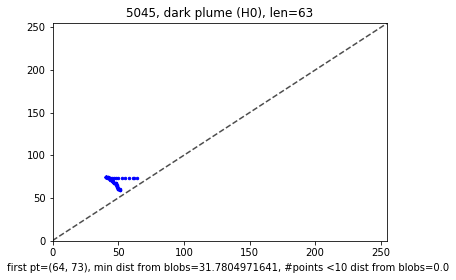

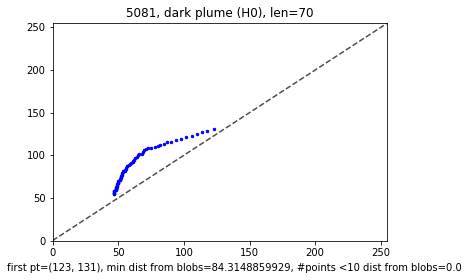

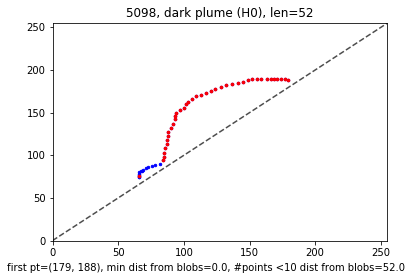

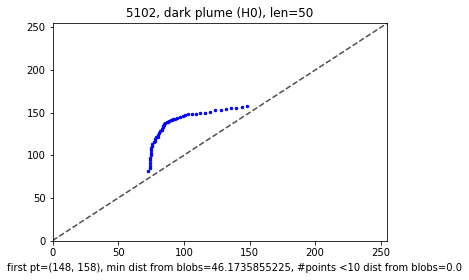

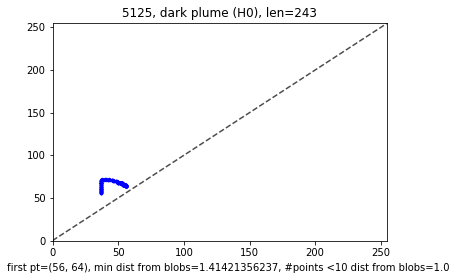

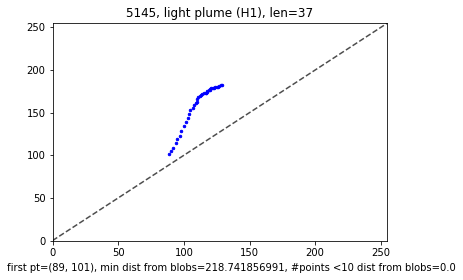

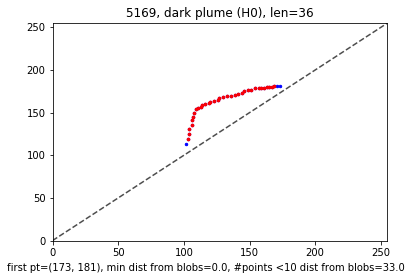

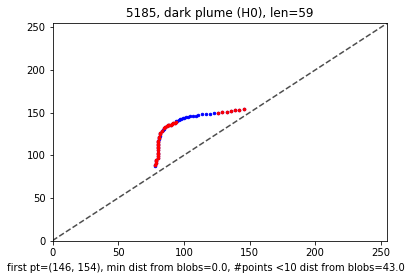

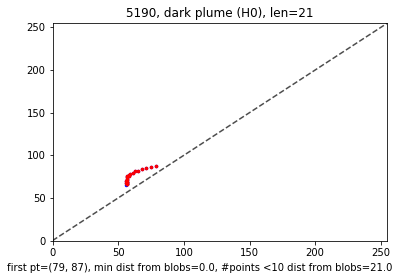

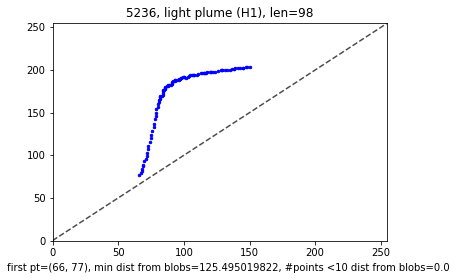

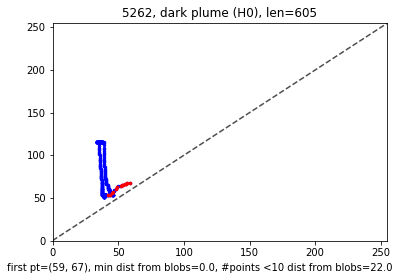

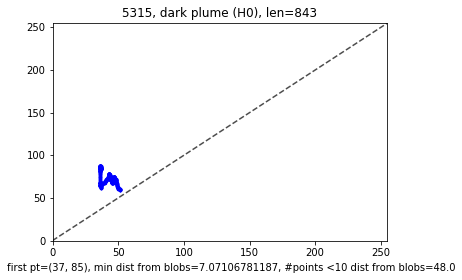

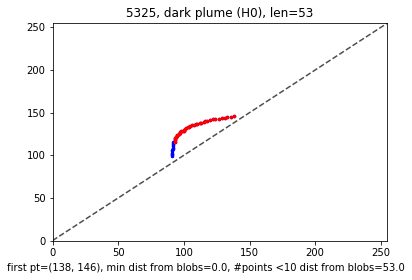

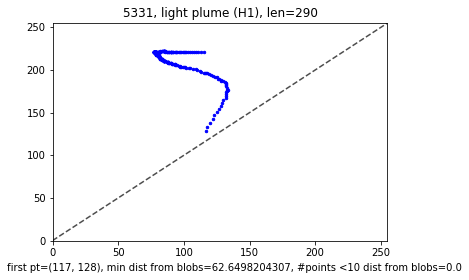

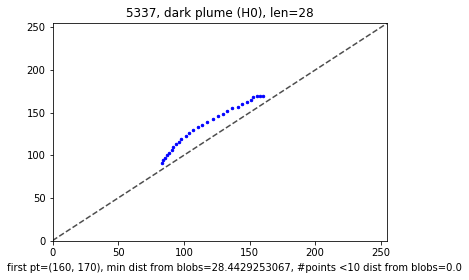

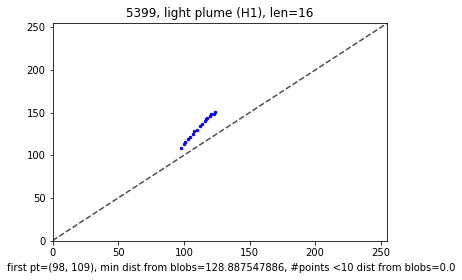

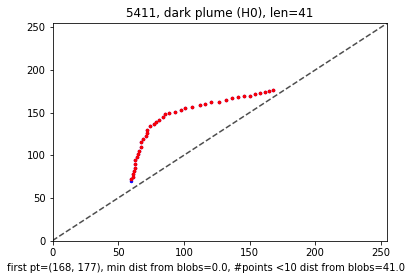

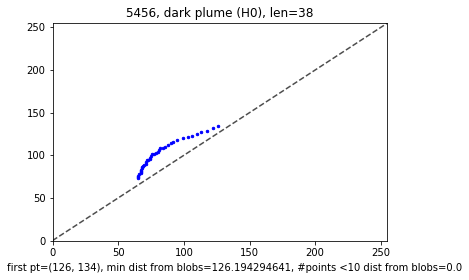

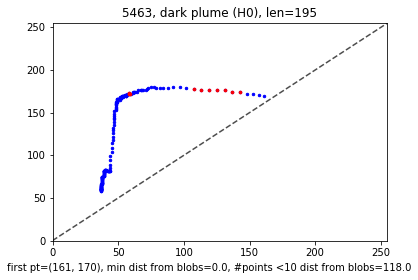

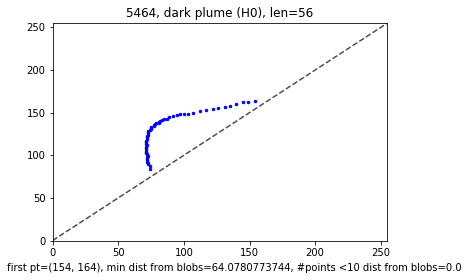

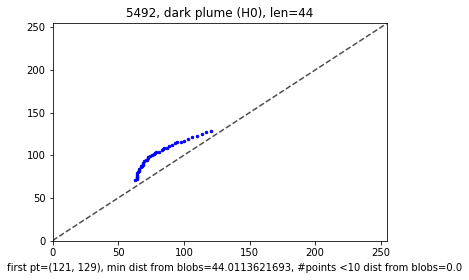

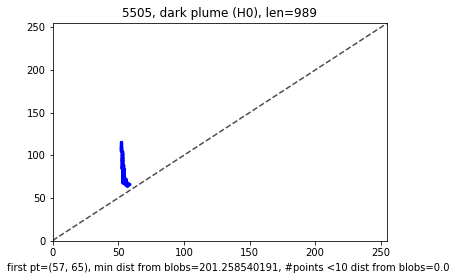

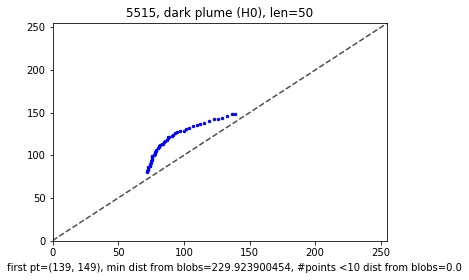

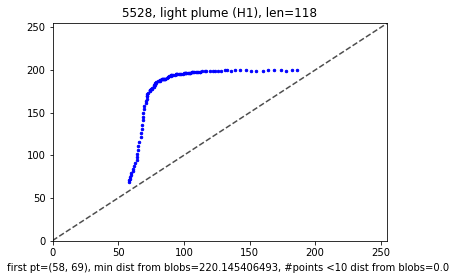

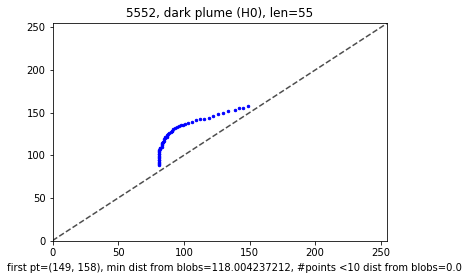

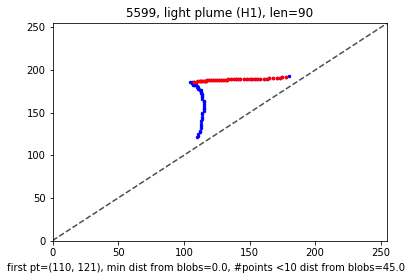

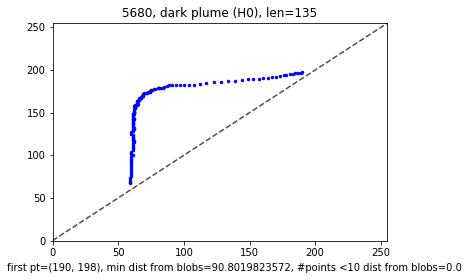

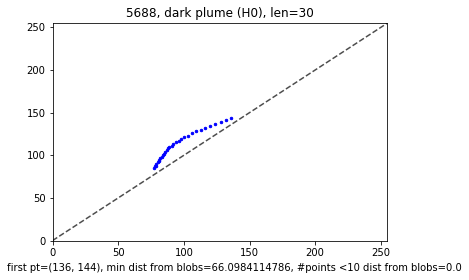

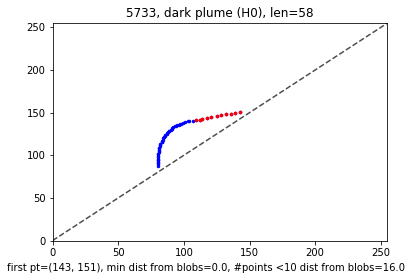

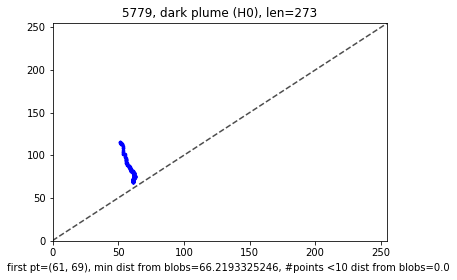

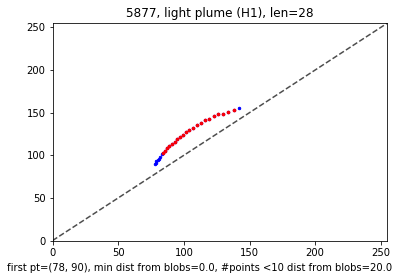

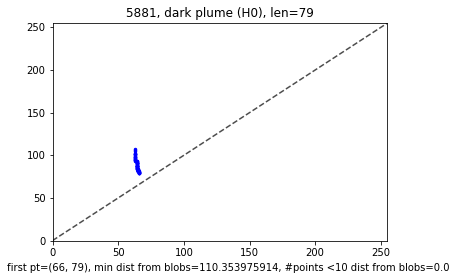

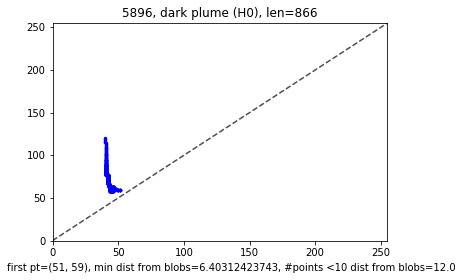

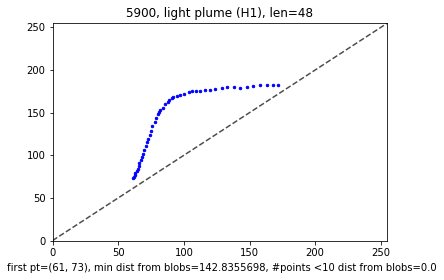

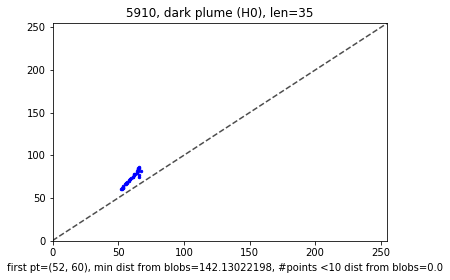

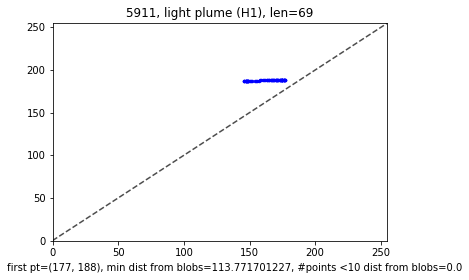

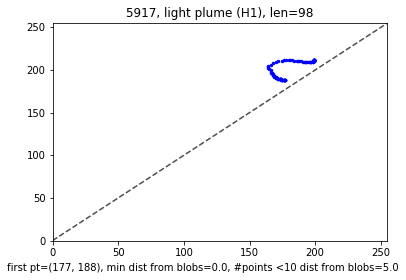

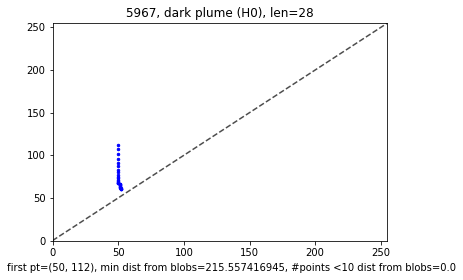

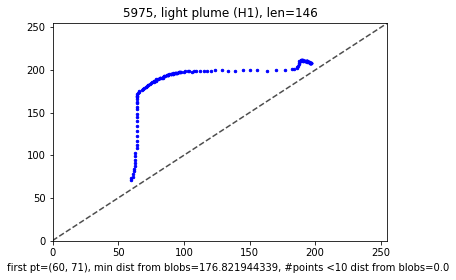

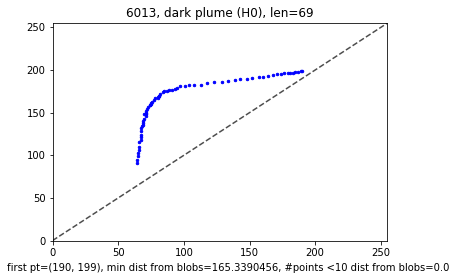

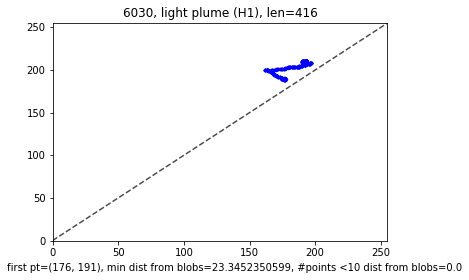

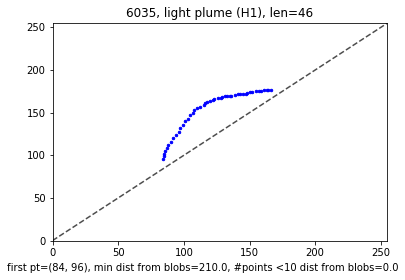

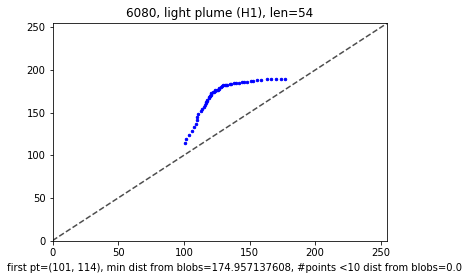

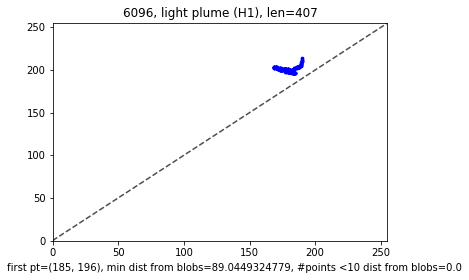

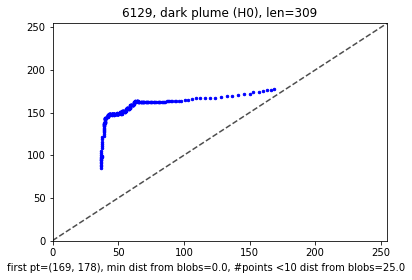

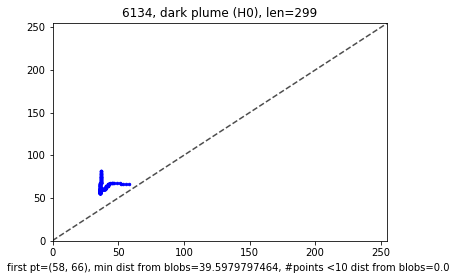

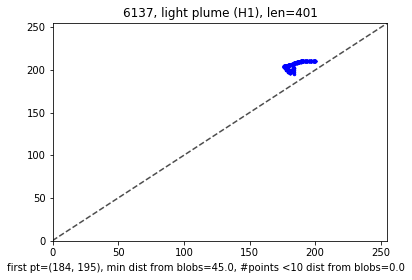

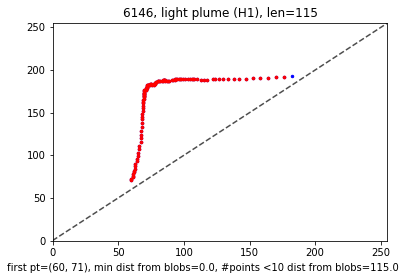

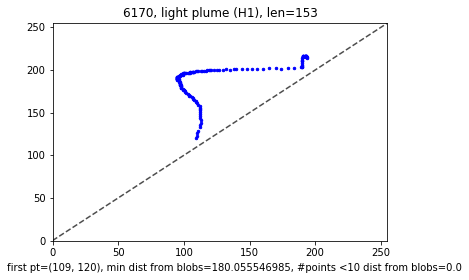

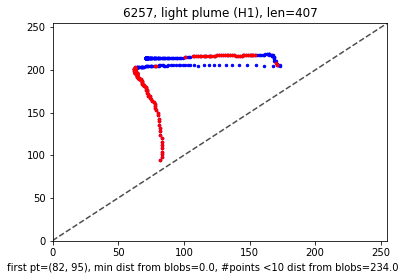

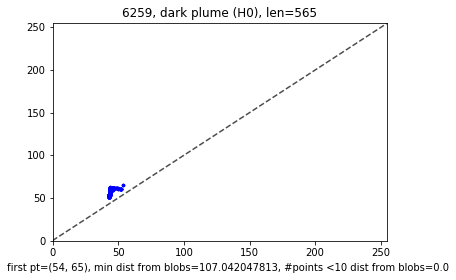

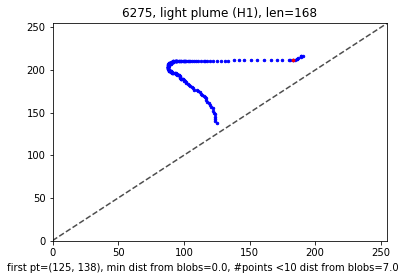

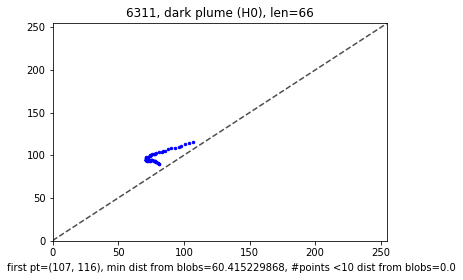

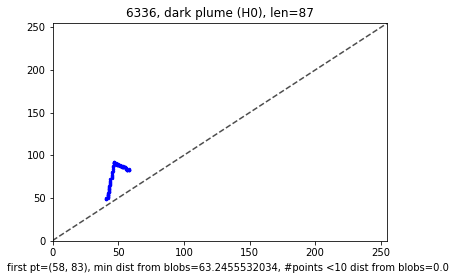

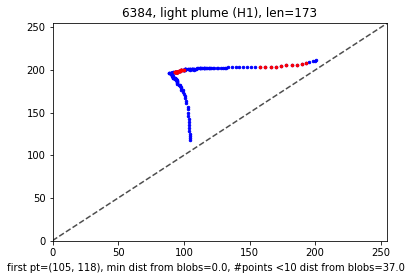

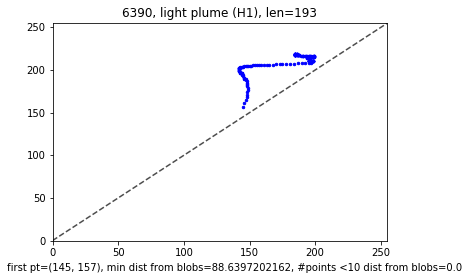

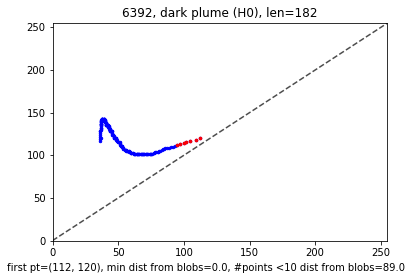

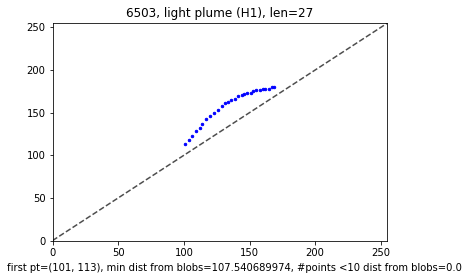

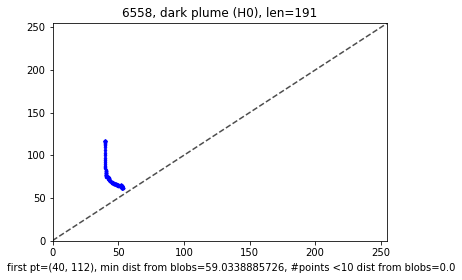

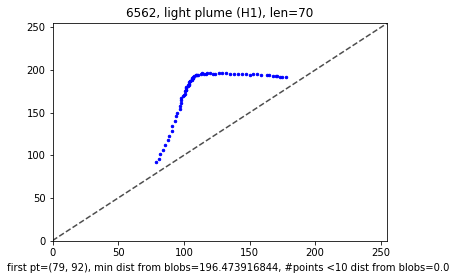

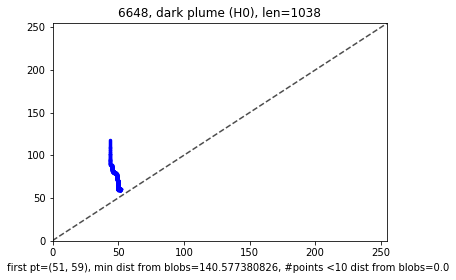

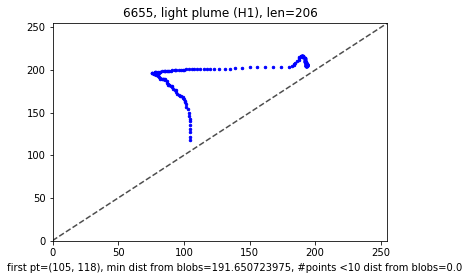

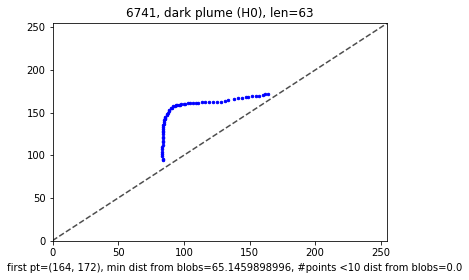

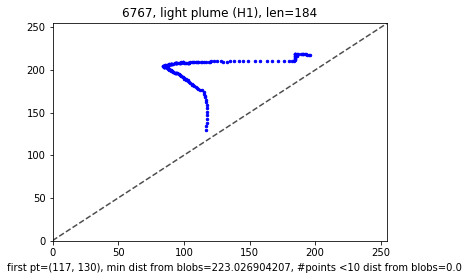

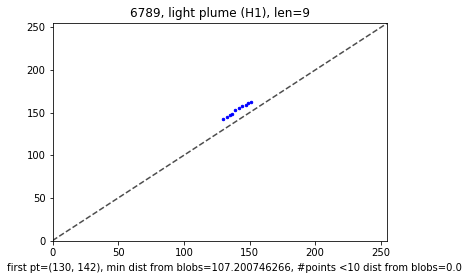

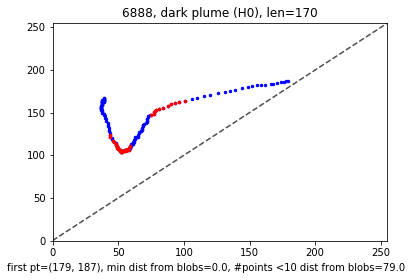

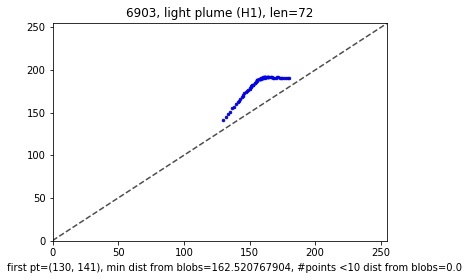

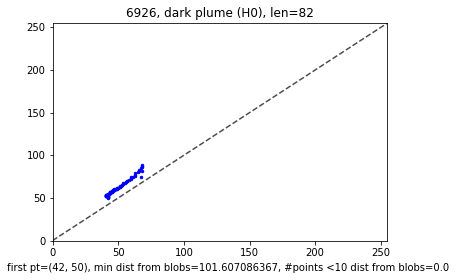

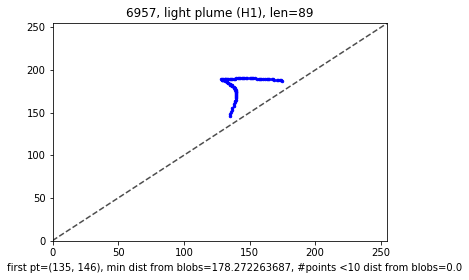

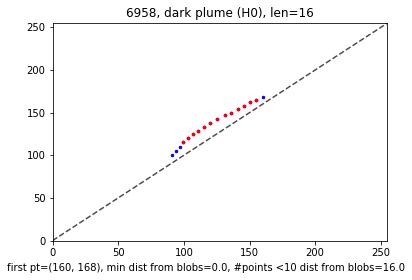

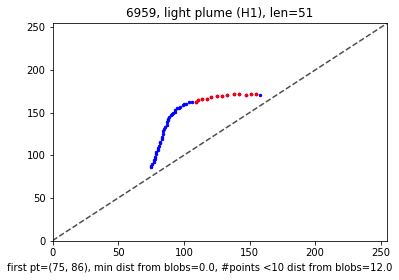

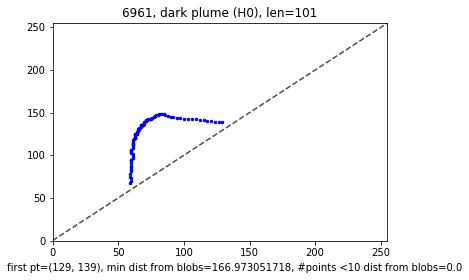

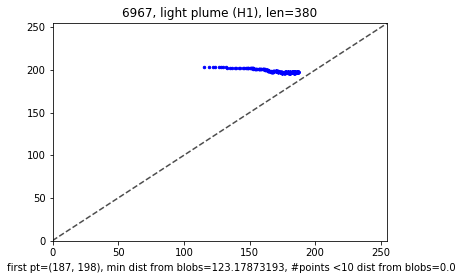

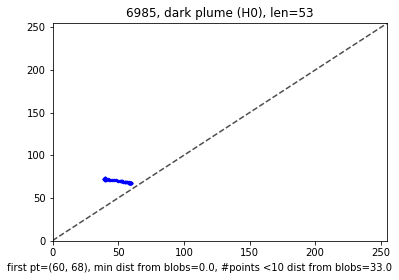

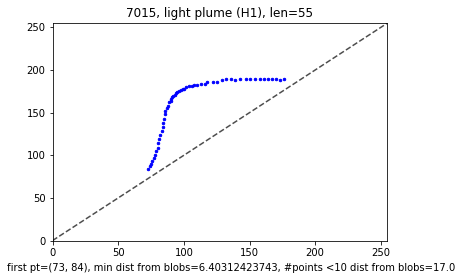

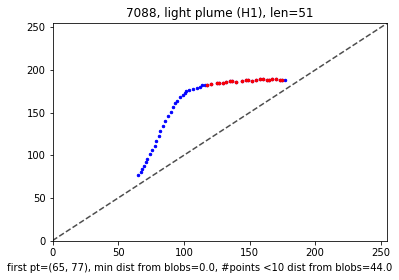

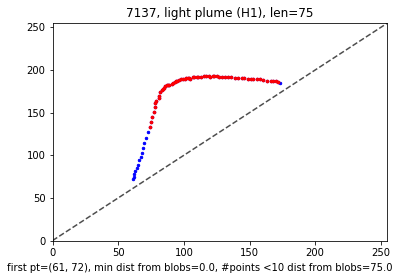

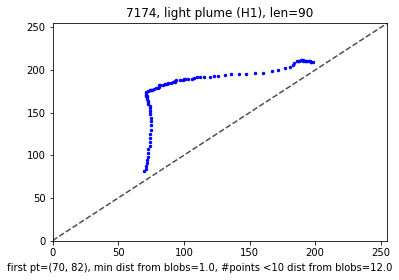

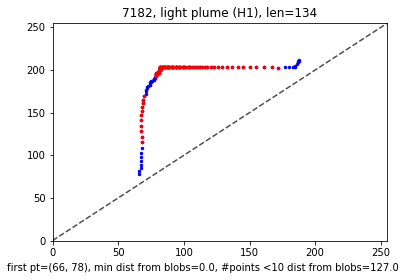

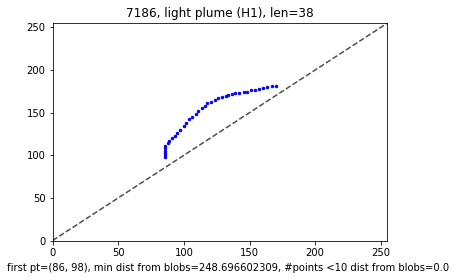

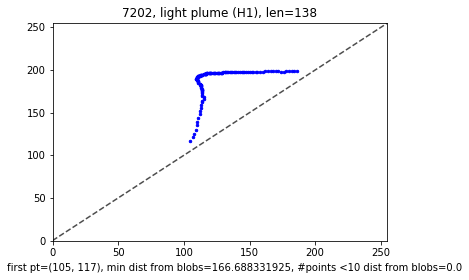

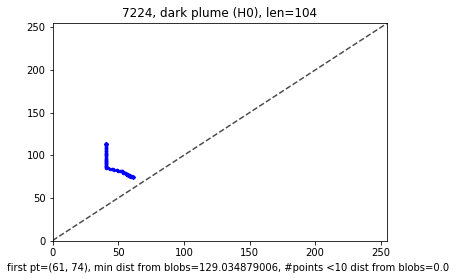

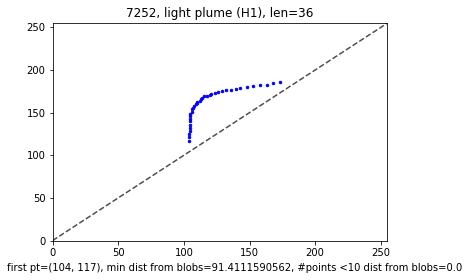

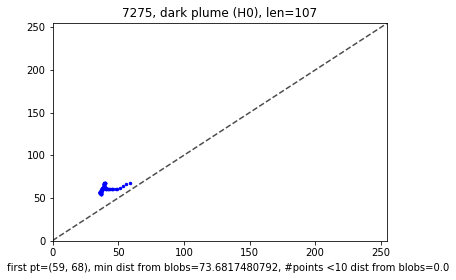

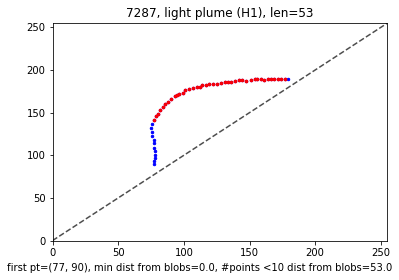

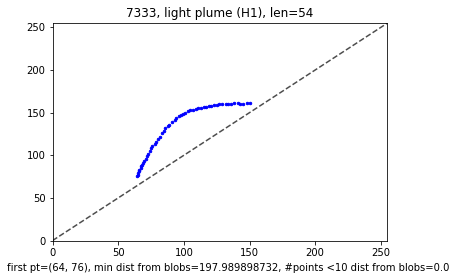

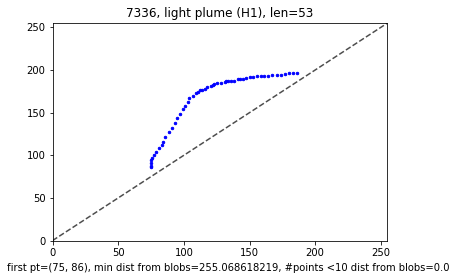

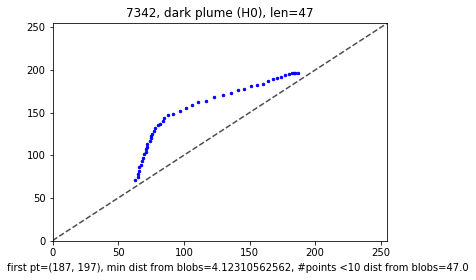

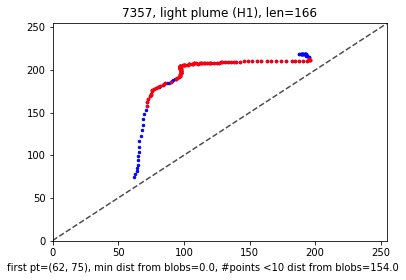

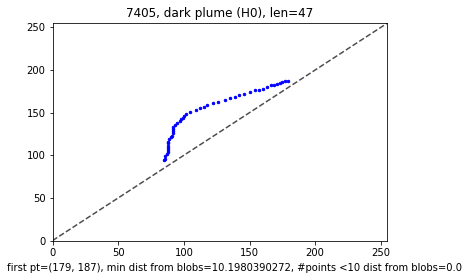

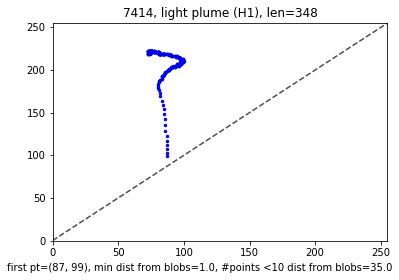

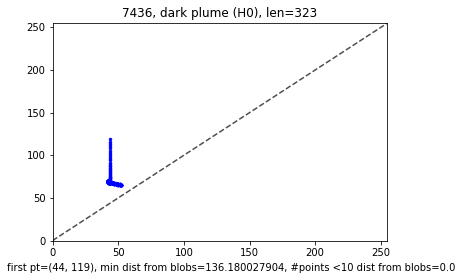

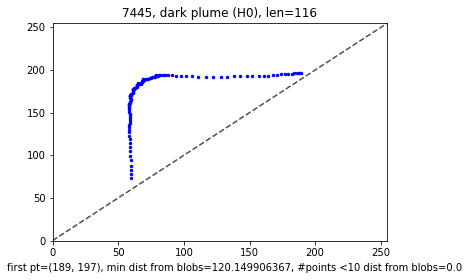

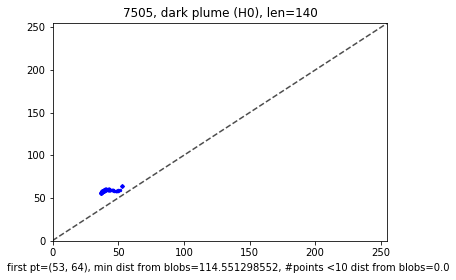

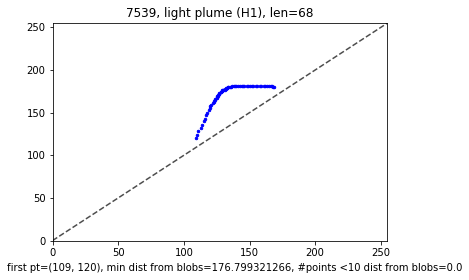

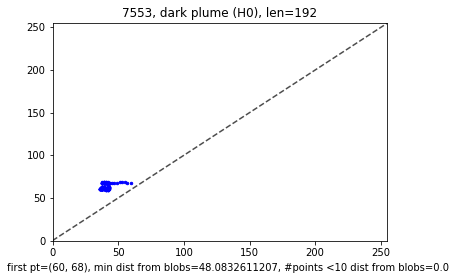

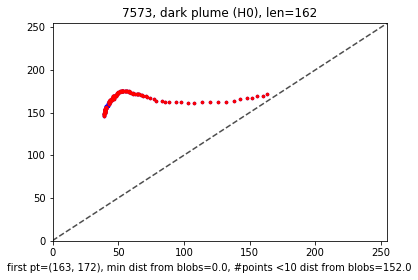

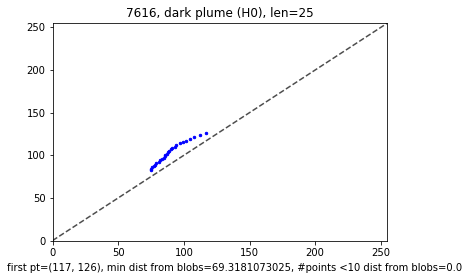

In [65]:
print('OUTPUT OF ALL PATHS SELECTED BY THE BOOLEAN FORMULA ')
for i in range(len(paths)):

    pathlen = paths[i][2] - paths[i][1]
    fldist = (paths[i][ind('birth')][0]-paths[i][ind('birth')][-1])*(paths[i][ind('birth')][0]-paths[i][ind('birth')][-1]) + (paths[i][ind('death')][0]-paths[i][ind('death')][-1])*(paths[i][ind('death')][0]-paths[i][ind('death')][-1])
    #sat = (pathlen > 30 and (paths[i][ind('avg_p_firstpts')] <= 15 or paths[i][ind('avg_p_lastpts')] <= 15) and paths[i][ind('max_p')] > 40 and pathlen < 200) or (pathlen > 600 and paths[i][ind('max_p')] > 140) or (paths[i][ind('birth')][0] <= 50 and pathlen > 45 and fldist > 5) or (paths[i][ind('birth')][0] >= 180 and pathlen > 45 and fldist > 5)
    maxbirth = np.amax(paths[i][ind('birth')])
    mindeath = np.amin(paths[i][ind('death')])
    sat = computesat(paths[i][ind('death')][0], paths[i][ind('birth')][0], paths[i][ind('death')][-1], paths[i][ind('birth')][-1], fldist, maxbirth, mindeath)
    
    if( sat ):
        begin = paths[i][1]
        end = paths[i][2]        
        
        #plots the path which picksup the vector
        pyp.title((str)(i) + ( ', dark plume (H0)' if paths[i][3] == 0 else ', light plume (H1)' ) + ', len=' + (str)(pathlen))
        pyp.scatter(paths[i][ind('birth')], paths[i][ind('death')], c= 'blue', s=6)
        if(paths[i][ind('dim')] == 0):  
            pyp.scatter(np.array(paths[i][ind('birth')][:pathlen])[np.equal(paths[i][ind('b_lyap')], np.zeros(pathlen))], np.array(paths[i][ind('death')][:pathlen])[np.equal(paths[i][ind('b_lyap')], np.zeros(pathlen))], c= 'red', s=7)
        if(paths[i][ind('dim')] == 1):
            pyp.scatter(np.array(paths[i][ind('birth')][:pathlen])[np.equal(paths[i][ind('d_lyap')], np.zeros(pathlen))], np.array(paths[i][ind('death')][:pathlen])[np.equal(paths[i][ind('d_lyap')], np.zeros(pathlen))], c= 'red', s=7)
        pyp.figtext(.02, .02, 'first pt=(' + (str)(paths[i][ind('birth')][0]) + ', ' + (str)(paths[i][ind('death')][0]) + '), min dist from blobs=' + (str)(paths[i][18]) + ', #points <10 dist from blobs=' + (str)(paths[i][19]))
        ax = pyp.gca()        
        ax.set_ylim([0,255])
        ax.set_xlim([0,255])
        ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
        pyp.show()

In [ ]:
import numpy as np
import skimage as ski
from skimage import io
from extract_paths import ind

def notnoisy(maxbirth, mindeath):
    return maxbirth > 50 and mindeath < 200

def computesat(death_b, birth_b, death_e, birth_e, fldist, maxbirth, mindeath):
    return ( (death_b-birth_b) < 30 or (death_e - birth_e) < 30 ) and fldist > 300 and notnoisy(maxbirth, mindeath)

spotsdir = 'g21per_spots2/'

pathmindists = np.zeros((len(paths),), dtype = float)

for i in range(len(paths)):
    begin = paths[i][1]
    end = paths[i][2]
    pathlen = paths[i][2] - paths[i][1]
    fldist = (paths[i][ind('birth')][0]-paths[i][ind('birth')][-1])*(paths[i][ind('birth')][0]-paths[i][ind('birth')][-1]) + (paths[i][ind('death')][0]-paths[i][ind('death')][-1])*(paths[i][ind('death')][0]-paths[i][ind('death')][-1])    
    maxbirth = np.amax(paths[i][ind('birth')])
    mindeath = np.amin(paths[i][ind('death')])

    sat = computesat(paths[i][ind('death')][0], paths[i][ind('birth')][0], paths[i][ind('death')][-1], paths[i][ind('birth')][-1], fldist, maxbirth, mindeath)
    if( sat ):           
        dists = []
        for j in range(pathlen):
            curframe = paths[i][1] + j
            img = io.imread(spotsdir + '%05d.bmp'%curframe)
            mask = (img == 255)
            indices = np.nonzero(mask)
            nrindices = len(indices[0])

            #compute mindists (currently distance of first point on the path)
            if(paths[i][ind('dim')] == 0): #plume location is (b_x,b_y)
                dists.append( np.min(np.sqrt( (np.full((nrindices,), paths[i][ind('b_x')][j]) - indices[1])*(np.full((nrindices,), paths[i][ind('b_x')][j]) - indices[1]) + (np.full((nrindices,), paths[i][ind('b_y')][j]) - indices[0])*( np.full((nrindices,), paths[i][ind('b_y')][j]) - indices[0] ) ) ) )
            if(paths[i][ind('dim')] == 1): #plume location is (d_x,d_y)
                dists.append( np.min(np.sqrt( (np.full((nrindices,), paths[i][ind('d_x')][j]) - indices[1])*(np.full((nrindices,), paths[i][ind('d_x')][j]) - indices[1]) + (np.full((nrindices,), paths[i][ind('d_y')][j]) - indices[0])*( np.full((nrindices,), paths[i][ind('d_y')][j]) - indices[0] ) ) ) )      
        pathmindists[i] = np.min(np.array(dists))
        print((str)(i) + ' ' + (str)(pathmindists[i]))
